# **Semesterabschließende schriftliche Ausarbeitung**  
**Fachhochschule Südwestfalen**

---

**Modul:** Deep Learning  
**Semester:** Wintersemester 2025/2026  
**Thema:** *Deep-Learning-basierte Inspektion von Tethered Caps: Modellvergleich, Threshold-Optimierung und industrielle Zero-Defect-Anforderungen*

---

### **Autoren**
**Sarah Gemünden** — Matrikelnummer: 30482243  
**Chanyut Bonkhamsaen** — Matrikelnummer: [Nummer einfügen]

---

**Abgabe am:** XX. Januar 2026  

---

# Gliederung

## 1. Einleitung
1.1 Hintergrund: Abfüllanlagen in der Getränkeindustrie  
1.2 Qualitätskontrolle im Verschließprozess  
1.3 Herausforderung durch Tethered Caps  
1.4 Motivation für den Einsatz von Deep Learning  
1.5 Zielsetzung der Arbeit  

## 2. Grundlagen
2.1 Prozessschritte in der Getränkeabfüllung  
2.2 Verschlussarten und Funktionsweise von Tethered Caps  
2.3 Klassische Bildverarbeitung in der Qualitätskontrolle  
2.4 Grenzen regelbasierter Verfahren  
2.5 Grundlagen Deep Learning  
&nbsp;&nbsp;&nbsp;&nbsp;2.5.1 Neuronale Netze  
&nbsp;&nbsp;&nbsp;&nbsp;2.5.2 Convolutional Neural Networks (CNNs)  
&nbsp;&nbsp;&nbsp;&nbsp;2.5.3 Transfer Learning  
&nbsp;&nbsp;&nbsp;&nbsp;2.5.4 Trainings-, Validierungs- und Testdaten  

## 3. Datenbasis und Problemstellung
3.1 Beschreibung des Datensatzes (gut/schlecht, Kameraperspektiven)  
3.2 Besonderheiten industrieller Bilddaten  
3.3 Herausforderungen: Lagevarianten, Bewegung, Verzerrungen  
3.4 Zieldefinition: Klassifikation „good“ vs. „bad“  
3.5 Qualitätsanforderungen (FN/FP-Raten, Industriestandards)  

## 4. Methoden
4.1 Datenvorbereitung  
&nbsp;&nbsp;&nbsp;&nbsp;4.1.1 Vorverarbeitungsschritte (Resize, Normalisierung, Padding)  
&nbsp;&nbsp;&nbsp;&nbsp;4.1.2 Train-/Val-Split  
4.2 Modellarchitekturen  
&nbsp;&nbsp;&nbsp;&nbsp;4.2.1 Eigenes CNN  
&nbsp;&nbsp;&nbsp;&nbsp;4.2.2 ResNet  
&nbsp;&nbsp;&nbsp;&nbsp;4.2.3 MobileNetV3  
&nbsp;&nbsp;&nbsp;&nbsp;4.2.4 EfficientNet-B0  
4.3 Trainingsverfahren  
&nbsp;&nbsp;&nbsp;&nbsp;4.3.1 Loss-Funktion  
&nbsp;&nbsp;&nbsp;&nbsp;4.3.2 Optimizer  
&nbsp;&nbsp;&nbsp;&nbsp;4.3.3 Hyperparameter  
4.4 Threshold-Optimierung  
4.5 OR-Logik über mehrere Kameraperspektiven  

## 5. Experimente & Ergebnisse
5.1 Trainingsergebnisse  
&nbsp;&nbsp;&nbsp;&nbsp;5.1.1 Loss & Accuracy  
5.2 Validierungsergebnisse  
5.3 Vergleich der Modelle  
&nbsp;&nbsp;&nbsp;&nbsp;– Eigenes CNN  
&nbsp;&nbsp;&nbsp;&nbsp;– ResNet (Base & Optimized)  
&nbsp;&nbsp;&nbsp;&nbsp;– MobileNetV3  
&nbsp;&nbsp;&nbsp;&nbsp;– EfficientNet-B0  
5.4 Threshold-Analyse (FP/FN-Raten)  
5.5 Kamera-Perspektivenanalyse (welche Kamera entdeckt am häufigsten Fehler?)  

## 6. Explainability
6.1 Motivation  
6.2 Feature Maps  
6.3 Grad-CAM  
6.4 Interpretation für „good“ und „bad“ Beispiele  
6.5 Nutzen für Produktion & Fehleranalyse  

## 7. Diskussion
7.1 Bewertung der Ergebnisse  
7.2 Praktische Einsatzfähigkeit im KHS-Produktionsumfeld  
7.3 Grenzen der Modelle  
7.4 Anforderungen an Rechenleistung & Echtzeittauglichkeit  

## 8. Fazit und Ausblick
8.1 Zusammenfassung  
8.2 Empfehlung für das beste Modell  
8.3 Potenziale in der industriellen Praxis  
8.4 Mögliche Erweiterungen (Online-Learning, Multiview-Netzwerke, Self-Supervised Learning)  

## 9. Literaturverzeichnis

# 1. Einleitung

In der Getränkeindustrie durchlaufen Flaschen in modernen Abfüllanlagen eine hochgradig automatisierte Prozesskette, die vom Reinigen über das Füllen bis hin zum Verschließen und Verpacken reicht. Direkt nach dem Verschließen wird jede Flasche einer qualitätssichernden Inspektion unterzogen. Dabei wird unter anderem kontrolliert, **ob ein Verschluss vorhanden ist, korrekt sitzt und den vorgegebenen Qualitätsanforderungen entspricht**. Fehlerhafte oder unvollständig verschlossene Flaschen müssen zuverlässig erkannt und aus dem Produktionsstrom ausgeschleust werden, um Reklamationen, Produktschäden und Sicherheitsrisiken zu vermeiden.

Bisher konnte diese Verschlussprüfung bei herkömmlichen Schraubverschlüssen weitgehend **regelbasiert** erfolgen. Die Verschlüsse besaßen eine relativ gleichförmige Geometrie, sodass definierte Merkmale wie ein typischer Ringspalt, die Rundheit oder eine feste Anzahl an Rastnasen über klassische Bildverarbeitungsverfahren zuverlässig detektiert werden konnten. Solche Systeme arbeiteten mit fest codierten Schwellenwerten und geometrischen Prüfregeln, die bei konstanten Formen und stabilen Lageverhältnissen gute Ergebnisse lieferten.

Mit der Einführung der sogenannten **Tethered Caps** hat sich die Ausgangssituation jedoch grundlegend verändert. Diese neuen, dauerhaft mit der Flasche verbundenen Verschlüsse weisen eine deutlich komplexere Geometrie auf. Der Deckel bleibt über ein Scharnier am Flaschenhals befestigt, wodurch er sich je nach Position der Flasche und Bewegungsdynamik in verschiedenste Orientierungen bewegen kann. Hinzu kommt, dass Flaschen auf dem Förderband — insbesondere bei hohen Taktzahlen — **nicht immer stabil stehen** und leichte Schrägstellungen, Rotationen oder Wackelbewegungen auftreten. Dies führt zu stark variierenden Bildstrukturen und erschwert die regelbasierte Erkennung erheblich.

Vor diesem Hintergrund stößt die klassische Bildverarbeitung zunehmend an ihre Grenzen: Die Vielzahl möglicher Verschlusslagen, Blickwinkel und Verdeckungen erfordert ein Maß an Flexibilität, das hart programmierte Regeln nicht mehr wirtschaftlich abbilden können. Der steigende Variantenreichtum sowie der Wunsch nach robusten, selbstadaptiven Prüfverfahren führen daher dazu, dass **Deep-Learning-basierte Methoden** zunehmend an Bedeutung gewinnen.

Neuronale Netze sind in der Lage, relevante Bildmerkmale automatisch aus Beispieldaten zu lernen, ohne dass diese explizit spezifiziert werden müssen. Dadurch eignen sie sich besonders für Aufgaben, bei denen die visuelle Struktur komplex, variabel oder durch Produktionsbedingungen beeinflusst ist — wie dies bei der Inspektion von Tethered Caps der Fall ist. Die KHS GmbH verfolgt daher das Ziel, eine lernbasierte Verschlussinspektion zu entwickeln, die robuste Ergebnisse liefert und sich flexibel auf neue Produkte oder Kamera-Setups anpassen lässt.

Ziel dieser Arbeit ist es, verschiedene Deep-Learning-Modelle zur Verschlussklassifikation zu untersuchen, ihre Leistungsfähigkeit zu vergleichen und deren Eignung für die industrielle Qualitätsprüfung im Umfeld moderner Getränkeabfüllanlagen zu bewerten.

**Pakete importieren**

In [1]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
from torchvision.transforms import functional as F
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
import torch.nn as nn
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tqdm import tqdm
from collections import Counter

**Zugriff auf Daten & erste explorative Analyse**

In [2]:
pfad = r"Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures"

Verzeichnis- und Mengenanalyse

In [3]:
# Counter für Gesamtstatistik
class_count = Counter()
all_image_paths = []

for root, dirs, files in os.walk(pfad):
    folder = os.path.basename(root).lower()
    
    if folder in ["good", "bad"]:
        for f in files:
            if f.lower().endswith((".jpg", ".jpeg", ".png")):
                class_count[folder] += 1
                all_image_paths.append(os.path.join(root, f))

print("Anzahl Bilder:")
print(class_count)
print(f"Gesamt: {sum(class_count.values())}")

Anzahl Bilder:
Counter({'good': 17188, 'bad': 14991})
Gesamt: 32179


Bildgrößen analysieren

In [4]:
sizes = []

for img_path in all_image_paths:
    try:
        with Image.open(img_path) as img:
            sizes.append(img.size)   # (Breite, Höhe)
    except:
        pass

print(f" Anzahl analysierter Bilder: {len(sizes)}")

# Häufigste Auflösungen anzeigen
from collections import Counter
size_count = Counter(sizes).most_common(50)

print("\n Häufigste Bildgrößen:")
for s, c in size_count:
    print(f"{s} → {c} Bilder")

 Anzahl analysierter Bilder: 32179

 Häufigste Bildgrößen:
(346, 113) → 4666 Bilder
(366, 109) → 3602 Bilder
(366, 116) → 3111 Bilder
(366, 118) → 2482 Bilder
(334, 112) → 2116 Bilder
(346, 117) → 2043 Bilder
(346, 108) → 2007 Bilder
(344, 113) → 1794 Bilder
(358, 113) → 1764 Bilder
(350, 119) → 1477 Bilder
(358, 127) → 1339 Bilder
(354, 121) → 1221 Bilder
(338, 117) → 1060 Bilder
(364, 125) → 919 Bilder
(356, 131) → 896 Bilder
(348, 122) → 850 Bilder
(358, 122) → 832 Bilder


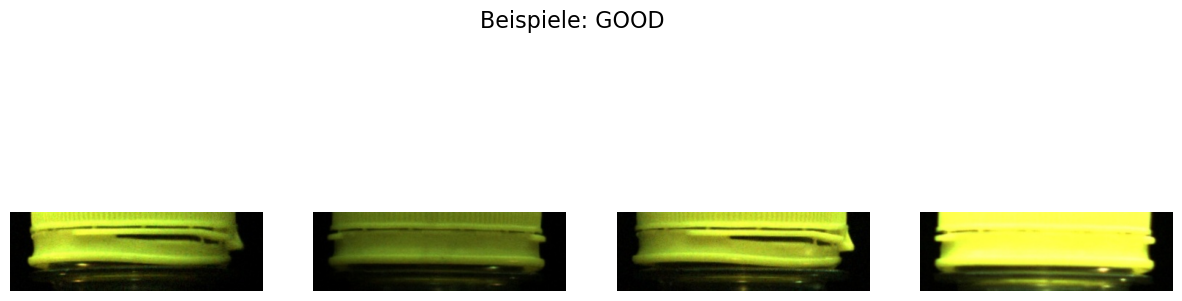

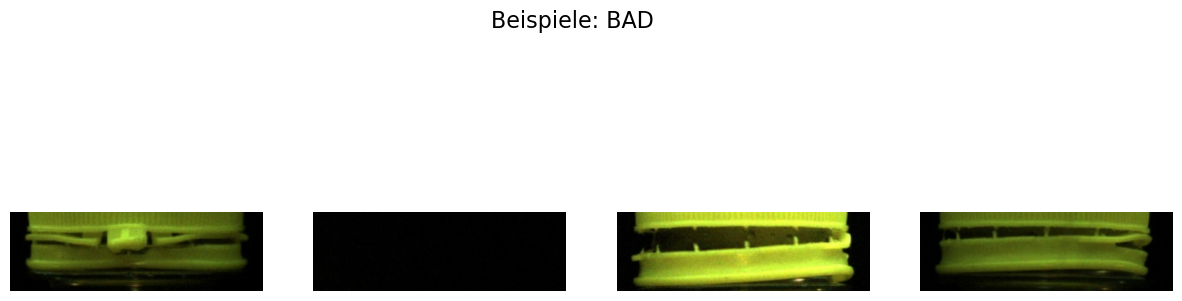

In [5]:
def show_examples(pfad, klasse, n=4):
    paths = []
    for root, dirs, files in os.walk(pfad):
        if os.path.basename(root).lower() == klasse:
            for f in files:
                if f.lower().endswith((".jpg", ".jpeg", ".png")):
                    paths.append(os.path.join(root, f))
    
    paths = paths[:n]
    
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    fig.suptitle(f"Beispiele: {klasse.upper()}", fontsize=16)
    
    for ax, p in zip(axes, paths):
        img = Image.open(p)
        ax.imshow(img)
        ax.axis("off")

show_examples(pfad, "good")
show_examples(pfad, "bad")

In [6]:
corrupted = 0

for img_path in tqdm(all_image_paths):
    try:
        Image.open(img_path).convert("RGB")
    except:
        corrupted += 1

print(f"❗ Korrupte Bilder: {corrupted}")

100%|██████████| 32179/32179 [00:50<00:00, 640.07it/s]

❗ Korrupte Bilder: 0


In [7]:
class RecursiveImageDataset(Dataset):
    """
    Ein PyTorch-Dataset zum rekursiven Einlesen von Bilddaten
    aus beliebig verschachtelten Ordnerstrukturen.

    Erwartete Ordnerstruktur:
        pfad/
            marke_1/
                good/
                bad/
            marke_2/
                good/
                bad/
            ...

    - Alle Unterordner, deren Name 'good' oder 'bad' ist, werden erkannt.
    - Alle .jpg/.jpeg/.png Dateien werden geladen.
    - good  -> Label 0
    - bad   -> Label 1
    """

    def __init__(self, pfad, transform=None):
        self.root_dir = pfad          # Oberordner
        self.transform = transform    # Optional: Transforms für PyTorch
        self.samples = []             # Liste aller (Bildpfad, Label)

        # Durchläuft ALLE Unterordner rekursiv
        for subdir, dirs, files in os.walk(self.root_dir):

            # Letzter Teil des Ordnernamens (z.B. 'good')
            folder_name = os.path.basename(subdir).strip().lower()

            # Nur Ordner 'good' oder 'bad' sind relevant
            if folder_name in ["good", "bad"]:

                # Label setzen
                label = 0 if folder_name == "good" else 1

                # Alle Dateien im Ordner durchgehen
                for file in files:

                    # Nur Bilddateien laden
                    if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                        img_path = os.path.join(subdir, file)

                        # Bildpfad + Label speichern
                        self.samples.append((img_path, label))

        print(f"Gefundene Bilder: {len(self.samples)}")

    def __len__(self):
        """
        Gibt die Anzahl aller Samples zurück.
        Notwendig für DataLoader.
        """
        return len(self.samples)

    def __getitem__(self, idx):
        """
        Lädt genau ein Bild anhand seines Index:
        - Öffnet Bild
        - Konvertiert nach RGB
        - Wendet ggf. Transform an
        - Gibt (Bildtensor, Label) zurück
        """

        img_path, label = self.samples[idx]

        # Bild laden
        image = Image.open(img_path).convert("RGB")

        # Optional: Preprocessing/Transforms (Resize, Normalize, etc.)
        if self.transform:
            image = self.transform(image)

        return image, label

In [8]:
def pad_to_square(img):
    """
    Macht ein Rechteckbild durch symmetrisches Padding zu einem Quadrat,
    ohne das Bild zu verzerren.

    Ablauf:
    - Breite (w) und Höhe (h) bestimmen
    - längste Seite wählen → Quadratgröße
    - links/rechts/oben/unten so viel auffüllen, dass w = h wird
    - F.pad füllt mit schwarzem Hintergrund (0)
    """

    w, h = img.size                      # Bildbreite und Bildhöhe
    max_side = max(w, h)                 # Zielgröße = größte Seite

    # Berechnung der benötigten Pixelränder, um ein Quadrat zu erzeugen
    pad_left   = (max_side - w) // 2
    pad_top    = (max_side - h) // 2
    pad_right  = max_side - w - pad_left
    pad_bottom = max_side - h - pad_top

    # F.pad erwartet Reihenfolge: (left, top, right, bottom)
    return F.pad(img, (pad_left, pad_top, pad_right, pad_bottom), fill=0)

In [9]:
transform = transforms.Compose([
    # 1. Bild quadratisch machen (ohne Verzerrung)
    transforms.Lambda(pad_to_square),

    # 2. Auf 224x224 skalieren (Standardgröße für viele CNN-Modelle)
    transforms.Resize((224, 224)),

    # 3. Bild in PyTorch Tensor umwandeln (Werte 0–1)
    transforms.ToTensor(),

    # 4. Normalisierung mit ImageNet-Statistiken
    #    → wichtig für Transfer Learning (ResNet, EfficientNet, MobileNet)
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],      # Durchschnittswerte der RGB-Kanäle
        std=[0.229, 0.224, 0.225]        # Standardabweichungen
    )
])

In [10]:
dataset = RecursiveImageDataset(pfad, transform=transform)
print(f"Gefundene Bilder: {len(dataset)}")

Gefundene Bilder: 32179
Gefundene Bilder: 32179


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: 0


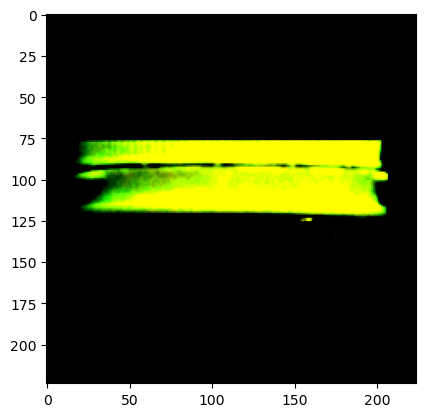

In [11]:
# Prüfen, ob das Dataset überhaupt Bilder enthält
if len(dataset) > 0:

    # Greift auf das 21. Bild im Dataset zu (Index 20)
    # → __getitem__ wird aufgerufen
    img, label = dataset[20]

    # Label ausgeben (0 = good, 1 = bad)
    print(f"Label: {label}")

    # Da img ein Tensor ist (C, H, W), muss er für Matplotlib
    # in die Form (H, W, C) gebracht werden.
    # permute(1, 2, 0) macht genau das.
    plt.imshow(img.permute(1, 2, 0))

    # Bild anzeigen
    plt.show()

else:
    print("Keine Bilder gefunden!")

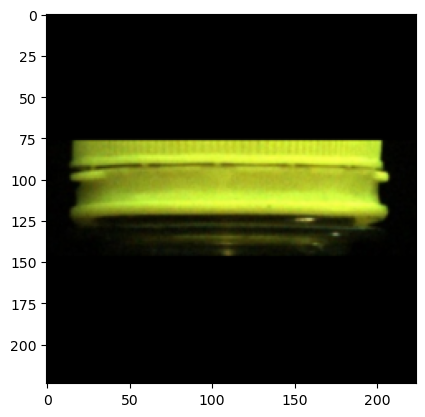

In [12]:
def denormalize(img_tensor):
    """
    Macht die Normalisierung rückgängig, damit man ein Bild wieder korrekt
    anzeigen kann.

    Warum notwendig?
    ----------------
    PyTorch Normalize macht:
        img = (img - mean) / std

    Für die Darstellung müssen wir wieder zurückrechnen:
        img = img * std + mean

    Damit wird das Bild wieder in den sichtbaren RGB-Bereich (0–1) gebracht.
    """

    # ImageNet-Mean und -Std wieder herstellen
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std  = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)

    # Rücknormalisierung
    return img_tensor * std + mean


# -------------------- Anwendung --------------------

# 1. Ein Sample aus dem Dataset holen
#    → Das Bild liegt noch NORMALISIERT als Tensor vor
img, label = dataset[20]

# 2. Denormalisieren, damit es realistisch angezeigt werden kann
img = denormalize(img)

# 3. Tensor-Layout (C, H, W) → (H, W, C) für Matplotlib
plt.imshow(img.permute(1, 2, 0))

# 4. Bild anzeigen
plt.show()

In [13]:
# ------------------------------
# 1. Liste aller Indexwerte erzeugen
# ------------------------------
# dataset hat z. B. 32.000 Bilder
# indices = [0, 1, 2, 3, ..., 31999]
indices = list(range(len(dataset)))

# ------------------------------
# 2. Aufteilen in Train- und Validierungsdaten
# ------------------------------
# test_size=0.2 bedeutet:
#   80% → Training
#   20% → Validation
# random_state sorgt für reproduzierbare Ergebnisse
train_idx, val_idx = train_test_split(indices, test_size=0.2, random_state=42)

# ------------------------------
# 3. Subsets erzeugen
# ------------------------------
# Subset macht Folgendes:
# - es packt NUR die ausgewählten Indexe in ein neues Dataset
# - die Daten werden NICHT dupliziert → sehr effizient
train_dataset = Subset(dataset, train_idx)
val_dataset = Subset(dataset, val_idx)

# ------------------------------
# 4. DataLoader erzeugen
# ------------------------------
# batch_size=32 → 32 Bilder pro Schritt
# shuffle=True → wichtig für Training, mischt Reihenfolge
# shuffle=False → für Validation und Test: immer gleich
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# ------------------------------
# 5. Größen ausgeben
# ------------------------------
print(f"Train: {len(train_dataset)}, Val: {len(val_dataset)}")

Train: 25743, Val: 6436


In [14]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        # -----------------------------
        # Feature-Extractor (Convolutional Layers)
        # -----------------------------
        self.conv_layers = nn.Sequential(

            # 1. Conv-Block
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),     # stabilisiert Training massiv
            nn.ReLU(),
            nn.MaxPool2d(2),        # 224 → 112

            # 2. Conv-Block
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)         # 112 → 56
        )

        # -----------------------------
        # Fully Connected Layers
        # -----------------------------
        # Die Lineareingabe hängt von der tatsächlichen Conv-Ausgabe ab.
        # Darum dummy input verwenden:
        dummy = torch.zeros(1, 3, 224, 224)
        conv_out = self.conv_layers(dummy)
        flatten_size = conv_out.numel()

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(flatten_size, 128),
            nn.ReLU(),
            nn.Linear(128, 2)       # 2 Klassen: good/bad
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x


# -----------------------------
# Modell & Device
# -----------------------------
model = SimpleCNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print("Modell erfolgreich geladen:", model)

Modell erfolgreich geladen: SimpleCNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=100352, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=2, bias=True)
  )
)


In [15]:
# Loss-Funktion:
# CrossEntropyLoss kombiniert:
# - LogSoftmax im Output
# - und die Negative Log-Likelihood
# und ist Standard für Mehrklassen-Klassifikation (hier: 2 Klassen good/bad)
criterion = nn.CrossEntropyLoss()

# Optimierer:
# Adam ist ein adaptiver Gradient-Optimierer,
# der in vielen Fällen schneller und stabiler konvergiert als reines SGD.
# lr=0.001 ist ein typischer Startwert.
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [16]:
epochs = 10
train_losses = []        # speichert die Loss-Werte pro Epoche
train_accuracies = []    # speichert die Accuracy pro Epoche

for epoch in range(epochs):

    model.train()            # Modell in den Trainingsmodus
    train_loss = 0.0         # Summe der Loss-Werte
    correct = 0              # Anzahl richtig klassifizierter Samples

    # Fortschrittsbalken (tqdm) für diese Epoche
    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", leave=False)

    for images, labels in loop:

        # Batch auf GPU (oder CPU)
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()        # Gradienten aus vorherigen Durchläufen löschen
        outputs = model(images)       # Vorwärtsdurchlauf
        loss = criterion(outputs, labels)   # Loss berechnen
        loss.backward()               # Backpropagation
        optimizer.step()              # Parameter update

        train_loss += loss.item()     # Loss für Statistiken aufsummieren

        # Vorhersagen bestimmen
        _, preds = torch.max(outputs, 1)

        # Anzahl korrekter Klassifikationen
        correct += (preds == labels).sum().item()

        # (Optional) Loss im Fortschrittsbalken anzeigen
        loop.set_postfix(loss=loss.item())

    # Accuracy pro Epoche berechnen
    acc = correct / len(train_dataset)

    # Statistiken speichern
    train_losses.append(train_loss)
    train_accuracies.append(acc)

    # Konsolenausgabe pro Epoche
    print(f"Epoch {epoch+1}/{epochs}, Loss: {train_loss:.4f}, Accuracy: {acc:.4f}")

Epoch 1/10, Loss: 393.8170, Accuracy: 0.8760


Epoch 2/10, Loss: 109.3959, Accuracy: 0.9471


Epoch 3/10, Loss: 72.7983, Accuracy: 0.9657


Epoch 4/10, Loss: 53.2577, Accuracy: 0.9755


Epoch 5/10, Loss: 37.0282, Accuracy: 0.9839


Epoch 6/10, Loss: 29.8351, Accuracy: 0.9861


Epoch 7/10, Loss: 25.2203, Accuracy: 0.9890


Epoch 8/10, Loss: 24.2282, Accuracy: 0.9892


Epoch 9/10, Loss: 17.8935, Accuracy: 0.9920


Epoch 10/10, Loss: 16.6381, Accuracy: 0.9921


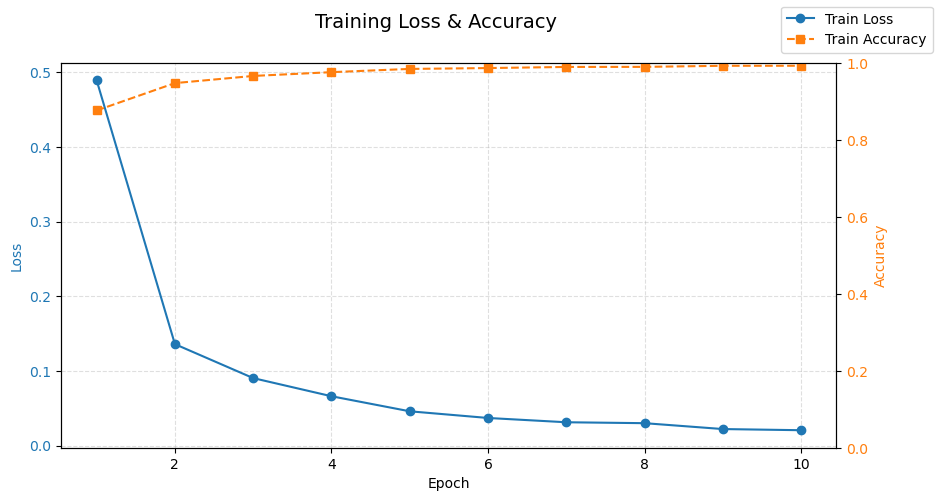

In [17]:
# --- Durchschnittlichen Loss pro Epoche berechnen (falls noch nicht gemacht) ---
# Falls du in deinem Training den Loss noch aufsummierst:
avg_losses = [loss / len(train_loader) for loss in train_losses]

# --- Plot: Loss (links) und Accuracy (rechts) ---
fig, ax1 = plt.subplots(figsize=(10, 5))

epochs_range = range(1, len(avg_losses) + 1)

# ----------------------
# Achse 1: Training Loss
# ----------------------
ax1.plot(epochs_range, avg_losses, label="Train Loss", marker='o', color='tab:blue')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True, linestyle='--', alpha=0.4)

# -------------------------
# Achse 2: Training Accuracy
# -------------------------
ax2 = ax1.twinx()  # zweite y-Achse teilen
ax2.plot(epochs_range, train_accuracies, label="Train Accuracy", marker='s', color='tab:orange', linestyle='--')
ax2.set_ylabel("Accuracy", color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.set_ylim(0, 1)  # Accuracy immer zwischen 0 und 1

# -------------------------
# Titel + Legenden
# -------------------------
fig.suptitle("Training Loss & Accuracy", fontsize=14)

# Gemeinsame Legende
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
fig.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")

plt.show()


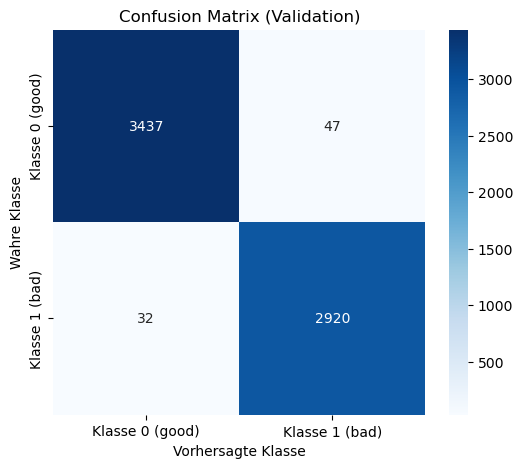

                 precision    recall  f1-score   support

Klasse 0 (good)       0.99      0.99      0.99      3484
 Klasse 1 (bad)       0.98      0.99      0.99      2952

       accuracy                           0.99      6436
      macro avg       0.99      0.99      0.99      6436
   weighted avg       0.99      0.99      0.99      6436



In [18]:
# -----------------------------------
# Modell in den Evaluationsmodus setzen
# -----------------------------------
# Wichtig:
# - deaktiviert Dropout
# - verwendet Running Means von BatchNorm
model.eval()

all_preds = []   # gespeicherte Modellvorhersagen
all_labels = []  # gespeicherte echten Labels

# -----------------------------------
# Validierungsschleife (Evaluation)
# -----------------------------------
with torch.no_grad():  # kein Gradienten-Tracking → schneller, weniger Speicher
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)          # Modellvorhersage
        _, preds = torch.max(outputs, 1) # höchste Wahrscheinlichkeit → Klasse

        # Speicherung der CPU-Werte für sklearn
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# -----------------------------------
# Confusion Matrix berechnen
# -----------------------------------
cm = confusion_matrix(all_labels, all_preds)

# -----------------------------------
# Confusion Matrix zeichnen
# -----------------------------------
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=["Klasse 0 (good)", "Klasse 1 (bad)"],
    yticklabels=["Klasse 0 (good)", "Klasse 1 (bad)"]
)
plt.xlabel("Vorhersagte Klasse")
plt.ylabel("Wahre Klasse")
plt.title("Confusion Matrix (Validation)")
plt.show()

# -----------------------------------
# Classification Report ausgeben
# -----------------------------------
print(classification_report(
    all_labels, all_preds,
    target_names=["Klasse 0 (good)", "Klasse 1 (bad)"]
))

In [112]:
# Dictionary, in dem wir die Aktivierungen speichern
activations = {}

def get_activation(name):
    """
    Hilfsfunktion, die einen Hook zurückgibt.
    Der Hook speichert den Output einer Schicht im Dictionary 'activations'.
    """
    def hook(model, input, output):
        activations[name] = output.detach().cpu()
    return hook

# Hooks an die Conv-Schichten hängen
# conv_layers[0] = erste Conv2d
# conv_layers[4] = zweite Conv2d (weil: Conv, BN, ReLU, MaxPool, Conv, ...)
model.conv_layers[0].register_forward_hook(get_activation("conv1"))
model.conv_layers[4].register_forward_hook(get_activation("conv2"))


In [113]:
model.eval()

img, label = dataset[0]  # Beispielbild
input_tensor = img.unsqueeze(0).to(device)

with torch.no_grad():
    _ = model(input_tensor)   # löst die Hooks aus

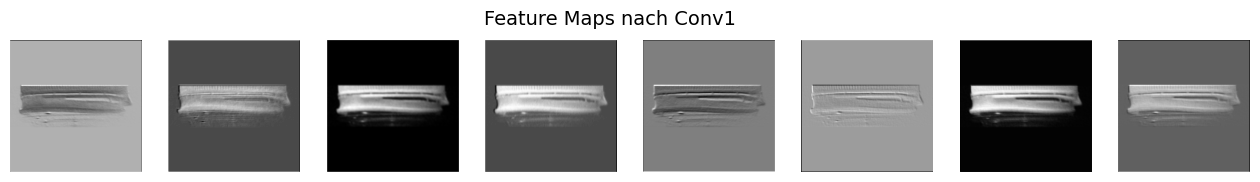

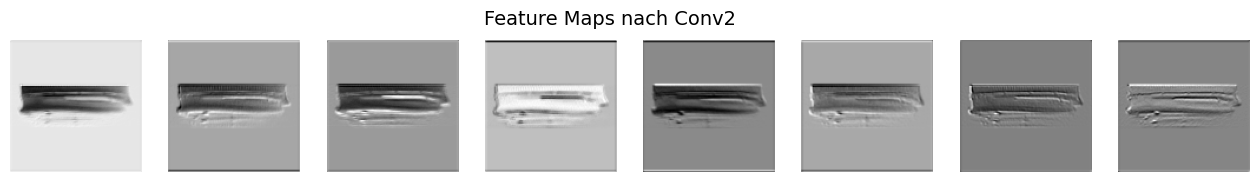

In [114]:
def show_feature_maps(activation, n_maps=8, title=""):
    act = activation[0]  # erstes Bild in Batch
    channels = act.shape[0]
    n_maps = min(n_maps, channels)

    fig, axes = plt.subplots(1, n_maps, figsize=(2*n_maps, 2))
    fig.suptitle(title, fontsize=14)

    for i in range(n_maps):
        axes[i].imshow(act[i].numpy(), cmap="gray")
        axes[i].axis("off")

    plt.show()

show_feature_maps(activations["conv1"], n_maps=8, title="Feature Maps nach Conv1")
show_feature_maps(activations["conv2"], n_maps=8, title="Feature Maps nach Conv2")

Index good: 0 Index bad: 1352


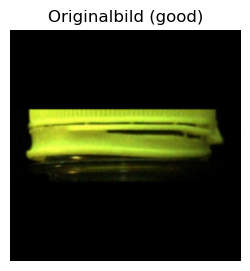

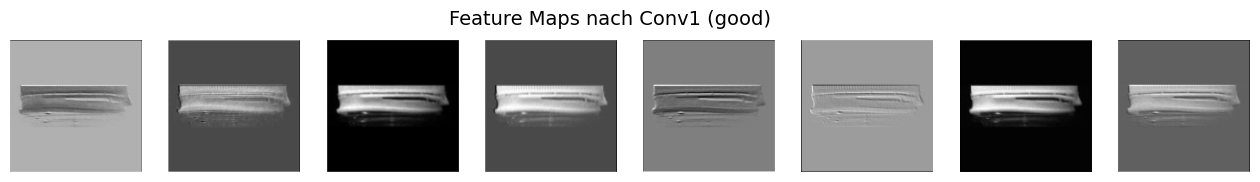

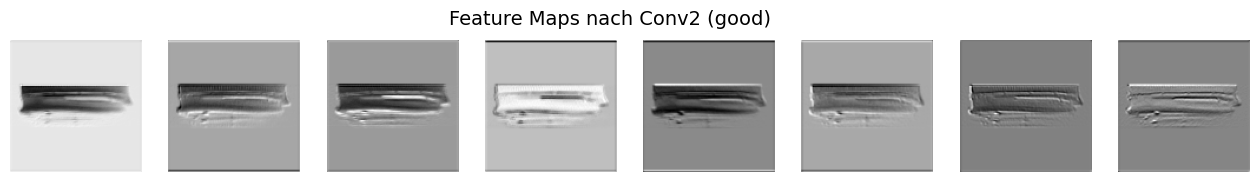

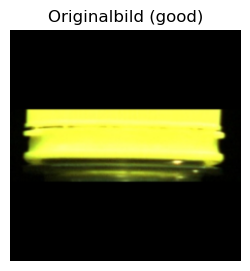

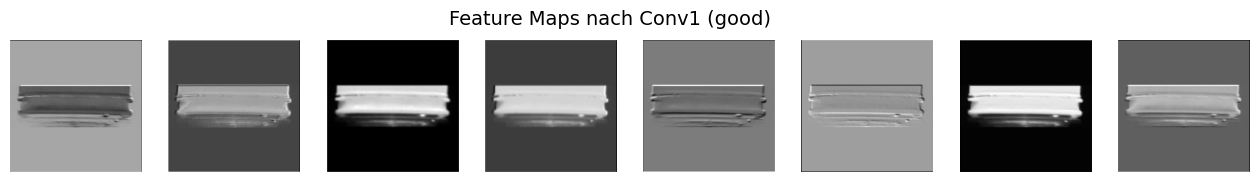

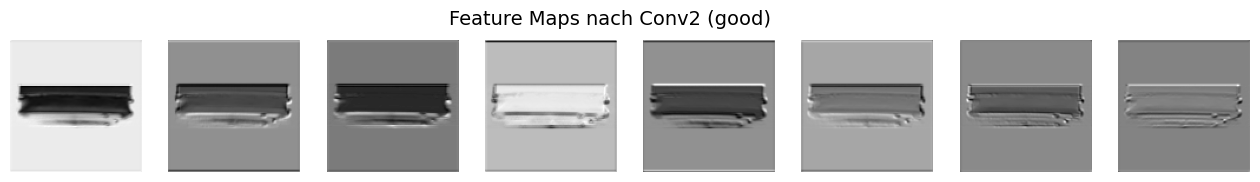

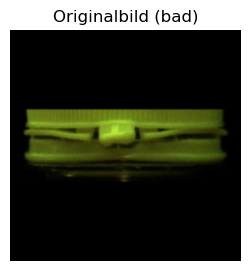

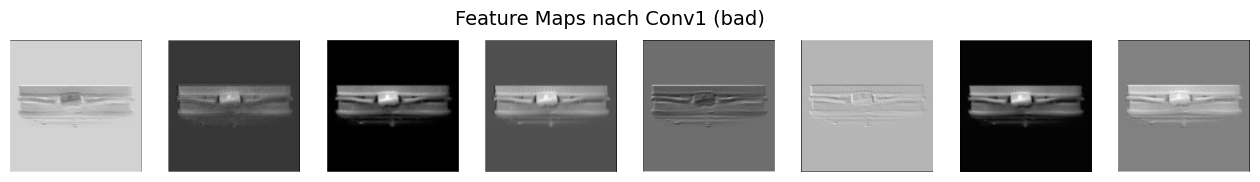

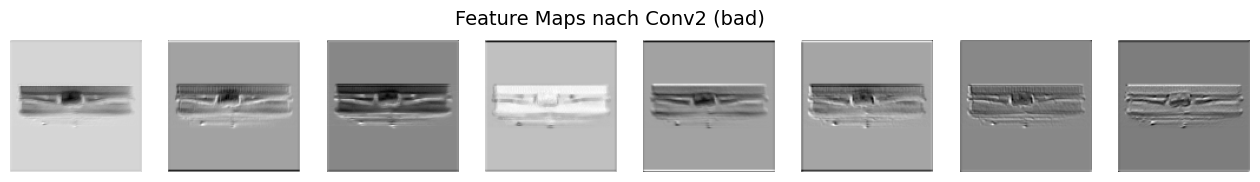

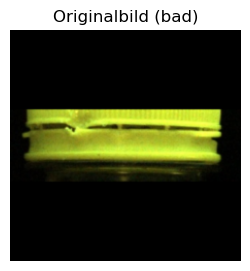

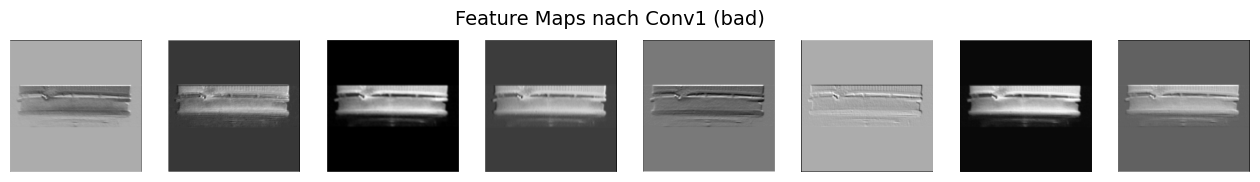

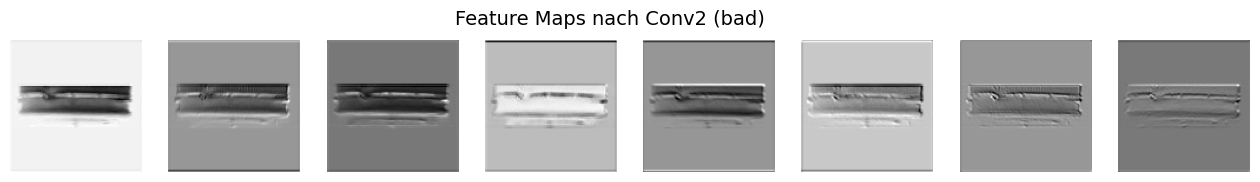

In [116]:
import torch
import matplotlib.pyplot as plt

# -------------------------------
# 1. Hooks (falls noch nicht gesetzt)
# -------------------------------
activations = {}

def get_activation(name):
    def hook(model, input, output):
        activations[name] = output.detach().cpu()
    return hook

# Nur einmal registrieren (wenn du es schon gemacht hast, diesen Block überspringen)
model.conv_layers[0].register_forward_hook(get_activation("conv1"))
model.conv_layers[4].register_forward_hook(get_activation("conv2"))

# -------------------------------
# 2. Helper: Feature-Maps plotten
# -------------------------------
def show_feature_maps(activation, n_maps=8, title=""):
    act = activation[0]  # erstes Bild im Batch
    channels = act.shape[0]
    n_maps = min(n_maps, channels)

    fig, axes = plt.subplots(1, n_maps, figsize=(2*n_maps, 2))
    fig.suptitle(title, fontsize=14)

    for i in range(n_maps):
        axes[i].imshow(act[i].numpy(), cmap="gray")
        axes[i].axis("off")

    plt.show()

# -------------------------------
# 3. Helper: ersten Index mit bestimmtem Label finden
# -------------------------------
def find_index_with_label(dataset, target_label):
    for i in range(len(dataset)):
        _, lbl = dataset[i]
        if lbl == target_label:
            return i
    return None

idx_good = find_index_with_label(dataset, 0)  # 0 = good
idx_bad  = find_index_with_label(dataset, 1)  # 1 = bad

print("Index good:", idx_good, "Index bad:", idx_bad)

# -------------------------------
# 4. Funktion: Feature-Maps für ein bestimmtes Sample zeigen
# -------------------------------
def visualize_sample(idx, label_name):
    model.eval()

    img, lbl = dataset[idx]           # transformiertes Bild + Label
    input_tensor = img.unsqueeze(0).to(device)

    with torch.no_grad():
        _ = model(input_tensor)       # löst die Hooks aus

    # Originalbild (denormalisiert) anzeigen
    def denormalize(img_tensor):
        mean = torch.tensor([0.485, 0.456, 0.406]).view(3,1,1)
        std  = torch.tensor([0.229, 0.224, 0.225]).view(3,1,1)
        return img_tensor * std + mean

    img_show = denormalize(img).permute(1, 2, 0).cpu().numpy()

    plt.figure(figsize=(3,3))
    plt.imshow(img_show)
    plt.axis("off")
    plt.title(f"Originalbild ({label_name})")
    plt.show()

    # Feature Maps plotten
    show_feature_maps(activations["conv1"], n_maps=8, title=f"Feature Maps nach Conv1 ({label_name})")
    show_feature_maps(activations["conv2"], n_maps=8, title=f"Feature Maps nach Conv2 ({label_name})")

# -------------------------------
# 5. Aufrufen: einmal GOOD, einmal BAD
# -------------------------------
visualize_sample(idx_good, "good")
visualize_sample(idx_good+3, "good")
visualize_sample(idx_bad, "bad")
visualize_sample(idx_bad+10, "bad")

In [117]:
from torchvision import models

# ------------------------------------
# ResNet18 mit ImageNet-Gewichten laden
# ------------------------------------
model_resnet = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

# Optional: Feature-Extractor einfrieren
for param in model_resnet.parameters():
    param.requires_grad = False

# ------------------------------------
# Finale FC-Schicht für 2 Klassen ersetzen
# ------------------------------------
num_ftrs = model_resnet.fc.in_features
model_resnet.fc = nn.Linear(num_ftrs, 2)

# FC-Schicht trainierbar machen
for param in model_resnet.fc.parameters():
    param.requires_grad = True

model_resnet = model_resnet.to(device)

In [118]:
criterion_resnet = nn.CrossEntropyLoss()

optimizer_resnet = torch.optim.Adam(
    model_resnet.fc.parameters(),
    lr=1e-4
)

In [119]:
epochs_resnet = 10

train_losses_resnet = []
val_losses_resnet = []
train_acc_resnet = []
val_acc_resnet = []

from tqdm import tqdm

for epoch in range(epochs_resnet):

    # -----------------------
    # TRAINING
    # -----------------------
    model_resnet.train()
    running_loss = 0.0
    correct = 0

    loop = tqdm(train_loader, desc=f"ResNet Epoch {epoch+1}/{epochs_resnet}", leave=False)

    for images, labels in loop:
        images, labels = images.to(device), labels.to(device)

        optimizer_resnet.zero_grad()

        outputs = model_resnet(images)
        loss = criterion_resnet(outputs, labels)
        loss.backward()
        optimizer_resnet.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()

        loop.set_postfix(loss=loss.item())

    epoch_train_loss = running_loss / len(train_loader)
    epoch_train_acc  = correct / len(train_loader.dataset)

    train_losses_resnet.append(epoch_train_loss)
    train_acc_resnet.append(epoch_train_acc)

    # -----------------------
    # VALIDATION
    # -----------------------
    model_resnet.eval()
    val_running_loss = 0.0
    val_correct = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model_resnet(images)
            loss = criterion_resnet(outputs, labels)

            val_running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()

    epoch_val_loss = val_running_loss / len(val_loader)
    epoch_val_acc  = val_correct / len(val_loader.dataset)

    val_losses_resnet.append(epoch_val_loss)
    val_acc_resnet.append(epoch_val_acc)

    # -----------------------
    # Ausgabe
    # -----------------------
    print(
        f"ResNet Epoch {epoch+1}/{epochs_resnet} | "
        f"Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.4f} | "
        f"Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.4f}"
    )

ResNet Epoch 1/10 | Train Loss: 0.5359, Train Acc: 0.7499 | Val Loss: 0.4369, Val Acc: 0.8311


ResNet Epoch 2/10 | Train Loss: 0.4232, Train Acc: 0.8237 | Val Loss: 0.3788, Val Acc: 0.8533


ResNet Epoch 3/10 | Train Loss: 0.3801, Train Acc: 0.8431 | Val Loss: 0.3448, Val Acc: 0.8684


ResNet Epoch 4/10 | Train Loss: 0.3593, Train Acc: 0.8505 | Val Loss: 0.3252, Val Acc: 0.8752


ResNet Epoch 5/10 | Train Loss: 0.3470, Train Acc: 0.8572 | Val Loss: 0.3149, Val Acc: 0.8738


ResNet Epoch 6/10 | Train Loss: 0.3333, Train Acc: 0.8617 | Val Loss: 0.3052, Val Acc: 0.8799


ResNet Epoch 7/10 | Train Loss: 0.3244, Train Acc: 0.8654 | Val Loss: 0.2930, Val Acc: 0.8869


ResNet Epoch 8/10 | Train Loss: 0.3197, Train Acc: 0.8678 | Val Loss: 0.2920, Val Acc: 0.8850


ResNet Epoch 9/10 | Train Loss: 0.3110, Train Acc: 0.8731 | Val Loss: 0.2826, Val Acc: 0.8912


ResNet Epoch 10/10 | Train Loss: 0.3097, Train Acc: 0.8715 | Val Loss: 0.2820, Val Acc: 0.8874


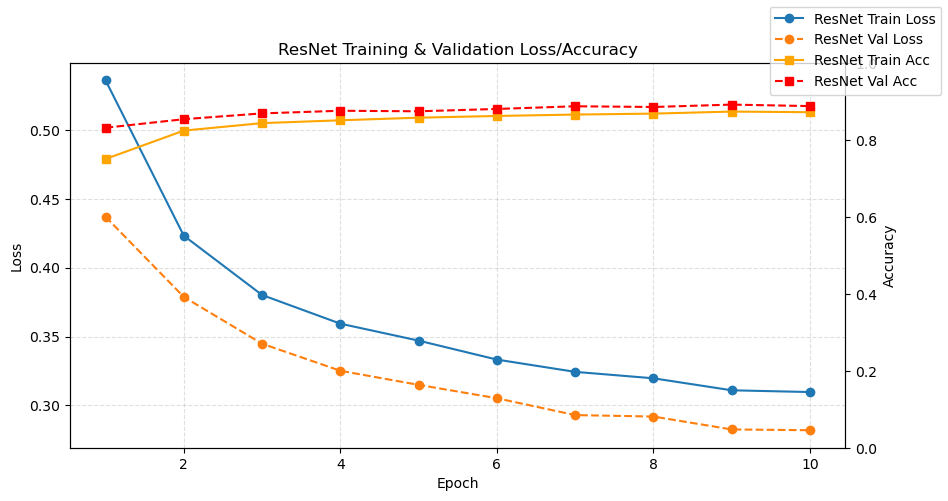

In [120]:
fig, ax1 = plt.subplots(figsize=(10,5))

epochs_range = range(1, epochs_resnet+1)

ax1.plot(epochs_range, train_losses_resnet, label="ResNet Train Loss", marker="o")
ax1.plot(epochs_range, val_losses_resnet, label="ResNet Val Loss", marker="o", linestyle="--")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.grid(True, linestyle="--", alpha=0.4)

ax2 = ax1.twinx()
ax2.plot(epochs_range, train_acc_resnet, label="ResNet Train Acc", marker="s", color="orange")
ax2.plot(epochs_range, val_acc_resnet, label="ResNet Val Acc", marker="s", linestyle="--", color="red")
ax2.set_ylabel("Accuracy")
ax2.set_ylim(0,1)

fig.legend(loc="upper right")
plt.title("ResNet Training & Validation Loss/Accuracy")
plt.show()

Gefundene Bilder: 32179
Gefundene Bilder: 32179


ResNet OPT Epoch 1/12 | Train Loss: 0.1199, Train Acc: 0.9541 | Val Loss: 0.0715, Val Acc: 0.9753


ResNet OPT Epoch 2/12 | Train Loss: 0.0461, Train Acc: 0.9826 | Val Loss: 0.0235, Val Acc: 0.9921


ResNet OPT Epoch 3/12 | Train Loss: 0.0335, Train Acc: 0.9879 | Val Loss: 0.0220, Val Acc: 0.9944


ResNet OPT Epoch 4/12 | Train Loss: 0.0274, Train Acc: 0.9900 | Val Loss: 0.0211, Val Acc: 0.9925


ResNet OPT Epoch 5/12 | Train Loss: 0.0188, Train Acc: 0.9941 | Val Loss: 0.0141, Val Acc: 0.9953


ResNet OPT Epoch 6/12 | Train Loss: 0.0201, Train Acc: 0.9936 | Val Loss: 0.0126, Val Acc: 0.9966


ResNet OPT Epoch 7/12 | Train Loss: 0.0157, Train Acc: 0.9947 | Val Loss: 0.0087, Val Acc: 0.9969


ResNet OPT Epoch 8/12 | Train Loss: 0.0162, Train Acc: 0.9946 | Val Loss: 0.0086, Val Acc: 0.9980


ResNet OPT Epoch 9/12 | Train Loss: 0.0140, Train Acc: 0.9951 | Val Loss: 0.0122, Val Acc: 0.9958


ResNet OPT Epoch 10/12 | Train Loss: 0.0097, Train Acc: 0.9968 | Val Loss: 0.0131, Val Acc: 0.9960


ResNet OPT Epoch 11/12 | Train Loss: 0.0101, Train Acc: 0.9964 | Val Loss: 0.0092, Val Acc: 0.9975


ResNet OPT Epoch 12/12 | Train Loss: 0.0090, Train Acc: 0.9970 | Val Loss: 0.0090, Val Acc: 0.9977


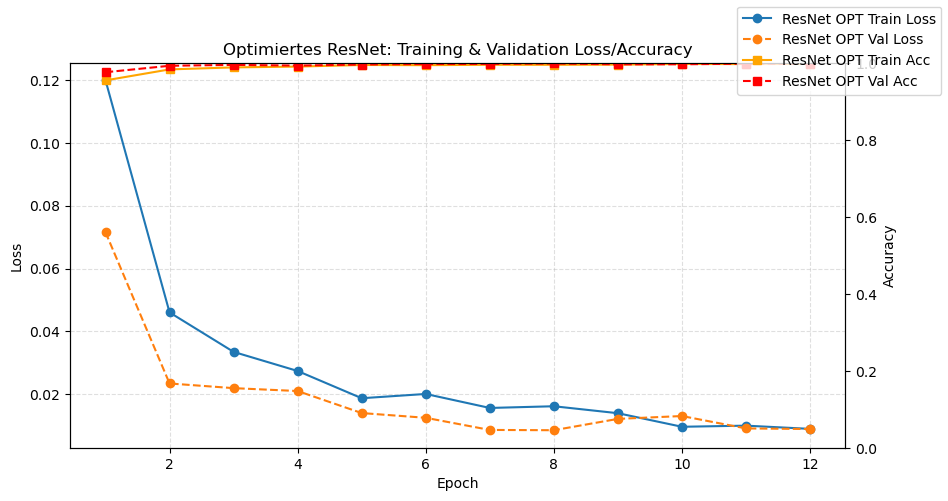

In [121]:
##############################################
# OPTIMIERTES RESNET - CLEARLY SEPARATED VERSION
##############################################

from torchvision import models
import torch.nn as nn
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt

###########################################################
# 1. Train-Transform (mit Augmentation) & Val-Transform
###########################################################

train_transform_resnet_opt = transforms.Compose([
    transforms.Lambda(pad_to_square),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

val_transform_resnet_opt = transforms.Compose([
    transforms.Lambda(pad_to_square),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Dataset + Split (Re-using your indices)
train_dataset_resnet_opt = Subset(
    RecursiveImageDataset(pfad, transform=train_transform_resnet_opt),
    train_idx
)

val_dataset_resnet_opt = Subset(
    RecursiveImageDataset(pfad, transform=val_transform_resnet_opt),
    val_idx
)

train_loader_resnet_opt = DataLoader(train_dataset_resnet_opt, batch_size=32, shuffle=True)
val_loader_resnet_opt   = DataLoader(val_dataset_resnet_opt, batch_size=32, shuffle=False)


###########################################################
# 2. ResNet18 Laden & Teilweise Freigeben (Fine-Tuning)
###########################################################

model_resnet_opt = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

# Erst alles einfrieren
for param in model_resnet_opt.parameters():
    param.requires_grad = False

# Dann layer4 freigeben
for param in model_resnet_opt.layer4.parameters():
    param.requires_grad = True

# FC-Schicht ersetzen
num_ftrs = model_resnet_opt.fc.in_features
model_resnet_opt.fc = nn.Linear(num_ftrs, 2)

# FC-Schicht trainierbar machen
for param in model_resnet_opt.fc.parameters():
    param.requires_grad = True

model_resnet_opt = model_resnet_opt.to(device)


###########################################################
# 3. Optimizer mit unterschiedlichen Lernraten
###########################################################

criterion_resnet_opt = nn.CrossEntropyLoss()

optimizer_resnet_opt = torch.optim.Adam([
    {"params": model_resnet_opt.layer4.parameters(), "lr": 1e-4},
    {"params": model_resnet_opt.fc.parameters(),      "lr": 5e-4},
])


###########################################################
# 4. Training + Validation Loop (Getrennt vom alten ResNet)
###########################################################

epochs_resnet_opt = 12
train_losses_resnet_opt = []
val_losses_resnet_opt = []
train_acc_resnet_opt = []
val_acc_resnet_opt = []

for epoch in range(epochs_resnet_opt):

    # -----------------------
    # TRAINING
    # -----------------------
    model_resnet_opt.train()
    running_loss = 0.0
    correct = 0

    loop = tqdm(train_loader_resnet_opt,
                desc=f"ResNet OPT Epoch {epoch+1}/{epochs_resnet_opt}",
                leave=False)

    for images, labels in loop:
        images, labels = images.to(device), labels.to(device)

        optimizer_resnet_opt.zero_grad()
        outputs = model_resnet_opt(images)
        loss = criterion_resnet_opt(outputs, labels)
        loss.backward()
        optimizer_resnet_opt.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()

        loop.set_postfix(loss=loss.item())

    epoch_train_loss = running_loss / len(train_loader_resnet_opt)
    epoch_train_acc  = correct / len(train_loader_resnet_opt.dataset)

    train_losses_resnet_opt.append(epoch_train_loss)
    train_acc_resnet_opt.append(epoch_train_acc)

    # -----------------------
    # VALIDATION
    # -----------------------
    model_resnet_opt.eval()
    val_running_loss = 0.0
    val_correct = 0

    with torch.no_grad():
        for images, labels in val_loader_resnet_opt:
            images, labels = images.to(device), labels.to(device)

            outputs = model_resnet_opt(images)
            loss = criterion_resnet_opt(outputs, labels)

            val_running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()

    epoch_val_loss = val_running_loss / len(val_loader_resnet_opt)
    epoch_val_acc  = val_correct / len(val_loader_resnet_opt.dataset)

    val_losses_resnet_opt.append(epoch_val_loss)
    val_acc_resnet_opt.append(epoch_val_acc)

    print(
        f"ResNet OPT Epoch {epoch+1}/{epochs_resnet_opt} | "
        f"Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.4f} | "
        f"Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.4f}"
    )


###########################################################
# 5. Plot (Loss + Accuracy, doppelte Achse)
###########################################################

fig, ax1 = plt.subplots(figsize=(10,5))

epochs_range = range(1, epochs_resnet_opt+1)

ax1.plot(epochs_range, train_losses_resnet_opt, label="ResNet OPT Train Loss", marker="o")
ax1.plot(epochs_range, val_losses_resnet_opt, label="ResNet OPT Val Loss", marker="o", linestyle="--")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.grid(True, linestyle="--", alpha=0.4)

ax2 = ax1.twinx()
ax2.plot(epochs_range, train_acc_resnet_opt, label="ResNet OPT Train Acc", marker="s", color="orange")
ax2.plot(epochs_range, val_acc_resnet_opt, label="ResNet OPT Val Acc", marker="s", linestyle="--", color="red")
ax2.set_ylabel("Accuracy")
ax2.set_ylim(0,1)

fig.legend(loc="upper right")
plt.title("Optimiertes ResNet: Training & Validation Loss/Accuracy")
plt.show()

Anzahl Validierungsbeispiele: 6436
Anteil Klasse good (0): 0.541
Anteil Klasse bad  (1): 0.459

Kandidaten, die die Bedingungen erfüllen:
Kein Threshold gefunden, der FN=0 und FP-Rate ≤ 1% erfüllt.


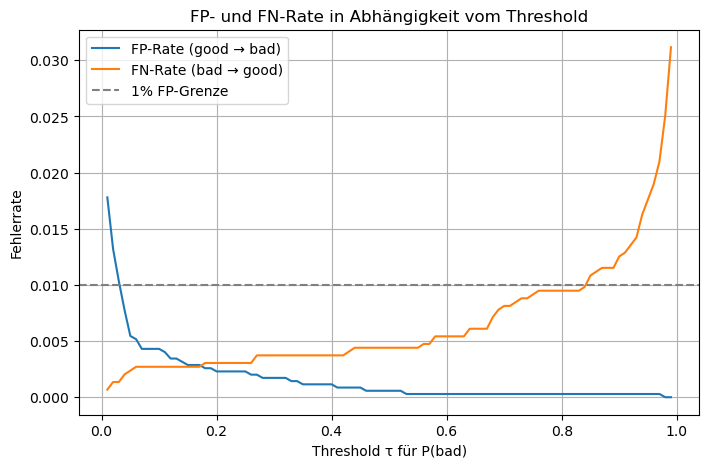

In [123]:
import numpy as np
import torch
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# ----------------------------------------
# 1. Wahrscheinlichkeiten auf dem Val-Set sammeln
# ----------------------------------------
model_resnet_opt.eval()

all_probs_bad = []   # P(bad) für jede Flasche
all_labels    = []   # echte Labels (0 = good, 1 = bad)

with torch.no_grad():
    for images, labels in val_loader_resnet_opt:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model_resnet_opt(images)              # Logits
        probs = torch.softmax(outputs, dim=1)           # in Wahrscheinlichkeiten umwandeln
        probs_bad = probs[:, 1]                         # Spalte 1 = Klasse "bad"

        all_probs_bad.extend(probs_bad.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

all_probs_bad = np.array(all_probs_bad)
all_labels    = np.array(all_labels)

print(f"Anzahl Validierungsbeispiele: {len(all_labels)}")
print(f"Anteil Klasse good (0): {(all_labels == 0).mean():.3f}")
print(f"Anteil Klasse bad  (1): {(all_labels == 1).mean():.3f}")

# ----------------------------------------
# 2. Threshold-Sweep: FP- und FN-Raten für viele Schwellen
# ----------------------------------------
thresholds = np.linspace(0.01, 0.99, 99)   # mögliche Schwellen für P(bad)

results = []   # zum Speichern der Kennzahlen pro Threshold

n_good = (all_labels == 0).sum()
n_bad  = (all_labels == 1).sum()

for tau in thresholds:
    # Vorhersage: "bad" wenn P(bad) >= tau, sonst "good"
    preds = (all_probs_bad >= tau).astype(int)

    # Confusion Matrix:
    # rows = true (0,1), cols = pred (0,1)
    cm = confusion_matrix(all_labels, preds, labels=[0, 1])
    tn, fp, fn, tp = cm.ravel()

    # FP-Rate bezogen auf good:
    #   "Wie viel Prozent der guten Flaschen werden fälschlich ausgeschleust?"
    fp_rate_good = fp / n_good if n_good > 0 else 0.0

    # FN-Rate bezogen auf bad:
    #   "Wie viel Prozent der defekten Flaschen laufen fälschlich als gut durch?"
    fn_rate_bad = fn / n_bad if n_bad > 0 else 0.0

    results.append({
        "tau": tau,
        "fp_rate_good": fp_rate_good,
        "fn_rate_bad": fn_rate_bad,
        "fp": fp,
        "fn": fn,
        "tn": tn,
        "tp": tp
    })

# ----------------------------------------
# 3. Thresholds suchen, die deine Bedingungen erfüllen
# ----------------------------------------
# Bedingungen:
#   - keine defekten Flaschen durchlassen → fn == 0
#   - max. 1% gute Flaschen fälschlich ausschleusen → fp_rate_good <= 0.01

valid_candidates = [
    r for r in results
    if r["fn"] == 0 and r["fp_rate_good"] <= 0.01
]

print("\nKandidaten, die die Bedingungen erfüllen:")
if valid_candidates:
    for r in valid_candidates:
        print(
            f"tau = {r['tau']:.2f} | "
            f"FP-Rate good: {r['fp_rate_good']*100:.2f}% "
            f"(FP={r['fp']}) | "
            f"FN-Rate bad: {r['fn_rate_bad']*100:.2f}% "
            f"(FN={r['fn']})"
        )
else:
    print("Kein Threshold gefunden, der FN=0 und FP-Rate ≤ 1% erfüllt.")

# Optional: den "besten" Threshold wählen, z.B. kleinste FP-Rate bei FN=0
if valid_candidates:
    best = min(valid_candidates, key=lambda r: r["fp_rate_good"])
    best_tau = best["tau"]
    print(f"\nGewählter Threshold (z.B. minimaler FP-Anteil bei FN=0): tau = {best_tau:.3f}")
else:
    best_tau = 0.5  # Fallback

# ----------------------------------------
# 4. (Optional) FP- vs. FN-Rate als Kurve plotten
# ----------------------------------------
fp_rates = [r["fp_rate_good"] for r in results]
fn_rates = [r["fn_rate_bad"] for r in results]

plt.figure(figsize=(8,5))
plt.plot(thresholds, fp_rates, label="FP-Rate (good → bad)")
plt.plot(thresholds, fn_rates, label="FN-Rate (bad → good)")
plt.axhline(0.01, color="gray", linestyle="--", label="1% FP-Grenze")
plt.xlabel("Threshold τ für P(bad)")
plt.ylabel("Fehlerrate")
plt.title("FP- und FN-Rate in Abhängigkeit vom Threshold")
plt.legend()
plt.grid(True)
plt.show()

Gefundene Bilder: 32179
Gefundene Bilder: 32179
MobileNet Train Samples: 25743, Val Samples: 6436
Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /home/sagem001/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth


100%|██████████| 9.83M/9.83M [00:00<00:00, 29.9MB/s]


Sequential(
  (0): Linear(in_features=576, out_features=1024, bias=True)
  (1): Hardswish()
  (2): Dropout(p=0.2, inplace=True)
  (3): Linear(in_features=1024, out_features=2, bias=True)
)


MobileNet Epoch 1/12 | Train Loss: 0.2163, Train Acc: 0.9088 | Val Loss: 0.1465, Val Acc: 0.9430


MobileNet Epoch 2/12 | Train Loss: 0.1154, Train Acc: 0.9562 | Val Loss: 0.0735, Val Acc: 0.9702


MobileNet Epoch 3/12 | Train Loss: 0.0894, Train Acc: 0.9667 | Val Loss: 0.0527, Val Acc: 0.9821


MobileNet Epoch 4/12 | Train Loss: 0.0675, Train Acc: 0.9742 | Val Loss: 0.0515, Val Acc: 0.9787


MobileNet Epoch 5/12 | Train Loss: 0.0577, Train Acc: 0.9785 | Val Loss: 0.0436, Val Acc: 0.9831


MobileNet Epoch 6/12 | Train Loss: 0.0531, Train Acc: 0.9813 | Val Loss: 0.0312, Val Acc: 0.9869


MobileNet Epoch 7/12 | Train Loss: 0.0413, Train Acc: 0.9853 | Val Loss: 0.0321, Val Acc: 0.9883


MobileNet Epoch 8/12 | Train Loss: 0.0388, Train Acc: 0.9866 | Val Loss: 0.0283, Val Acc: 0.9897


MobileNet Epoch 9/12 | Train Loss: 0.0361, Train Acc: 0.9876 | Val Loss: 0.0320, Val Acc: 0.9876


MobileNet Epoch 10/12 | Train Loss: 0.0330, Train Acc: 0.9880 | Val Loss: 0.0288, Val Acc: 0.9888


MobileNet Epoch 11/12 | Train Loss: 0.0302, Train Acc: 0.9893 | Val Loss: 0.0312, Val Acc: 0.9908


MobileNet Epoch 12/12 | Train Loss: 0.0280, Train Acc: 0.9901 | Val Loss: 0.0146, Val Acc: 0.9941


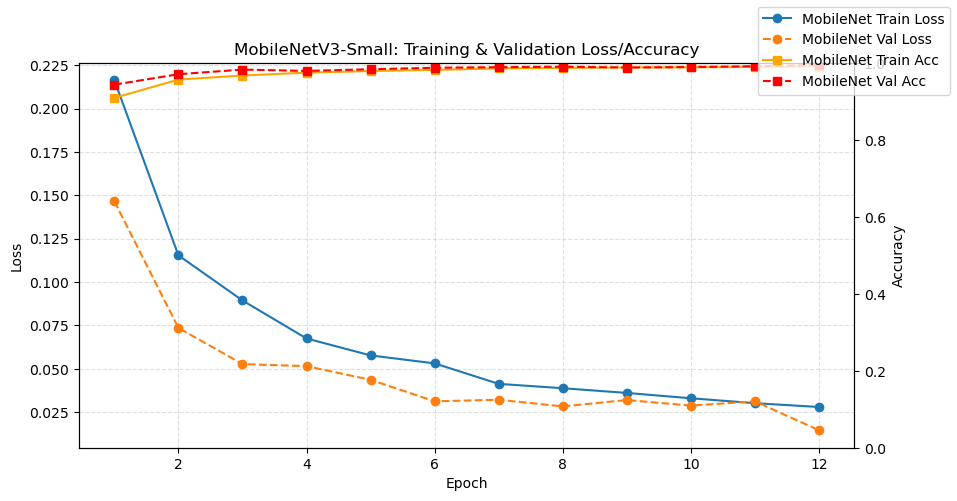

In [122]:
##############################################
# MobileNetV3-Small – Fine-Tuning Setup
##############################################

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Subset
from torchvision import models, transforms
from tqdm import tqdm
import matplotlib.pyplot as plt

##############################################
# 1. Transforms (Train mit Augmentation, Val ohne)
##############################################

train_transform_mobilenet = transforms.Compose([
    transforms.Lambda(pad_to_square),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

val_transform_mobilenet = transforms.Compose([
    transforms.Lambda(pad_to_square),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Dataset + Split (nutzt dieselben Indizes wie vorher)
train_dataset_mobilenet = Subset(
    RecursiveImageDataset(pfad, transform=train_transform_mobilenet),
    train_idx
)

val_dataset_mobilenet = Subset(
    RecursiveImageDataset(pfad, transform=val_transform_mobilenet),
    val_idx
)

train_loader_mobilenet = DataLoader(train_dataset_mobilenet, batch_size=32, shuffle=True)
val_loader_mobilenet   = DataLoader(val_dataset_mobilenet, batch_size=32, shuffle=False)

print(f"MobileNet Train Samples: {len(train_dataset_mobilenet)}, Val Samples: {len(val_dataset_mobilenet)}")

##############################################
# 2. MobileNetV3-Small laden & anpassen
##############################################

# Vortrainiertes MobileNetV3-Small (ImageNet)
model_mobilenet = models.mobilenet_v3_small(
    weights=models.MobileNet_V3_Small_Weights.IMAGENET1K_V1
)

# Erstmal alles einfrieren
for param in model_mobilenet.parameters():
    param.requires_grad = False

# Die letzten Blöcke des Feature-Extractors freigeben (mehr als nur FC)
# features ist eine Sequential-Liste von Blöcken; wir geben z.B. die letzten 3 frei
for param in model_mobilenet.features[-3:].parameters():
    param.requires_grad = True

# Classifier an 2 Klassen anpassen
# Aufbau von mobilenet_v3_small.classifier: [Linear, Hardswish, Dropout, Linear]
num_ftrs = model_mobilenet.classifier[3].in_features
model_mobilenet.classifier[3] = nn.Linear(num_ftrs, 2)

# Classifier vollständig trainierbar machen
for param in model_mobilenet.classifier.parameters():
    param.requires_grad = True

model_mobilenet = model_mobilenet.to(device)
print(model_mobilenet.classifier)

##############################################
# 3. Loss & Optimizer (mit zwei Lernraten)
##############################################

criterion_mobilenet = nn.CrossEntropyLoss()

optimizer_mobilenet = torch.optim.Adam([
    {"params": model_mobilenet.features[-3:].parameters(), "lr": 1e-4},  # fein tunen
    {"params": model_mobilenet.classifier.parameters(),    "lr": 5e-4},  # neue Köpfe schneller lernen lassen
])

##############################################
# 4. Training + Validation Loop
##############################################

epochs_mobilenet = 12

train_losses_mobilenet = []
val_losses_mobilenet   = []
train_acc_mobilenet    = []
val_acc_mobilenet      = []

for epoch in range(epochs_mobilenet):

    # -------- TRAINING --------
    model_mobilenet.train()
    running_loss = 0.0
    correct = 0

    loop = tqdm(train_loader_mobilenet,
                desc=f"MobileNet Epoch {epoch+1}/{epochs_mobilenet}",
                leave=False)

    for images, labels in loop:
        images, labels = images.to(device), labels.to(device)

        optimizer_mobilenet.zero_grad()
        outputs = model_mobilenet(images)
        loss = criterion_mobilenet(outputs, labels)
        loss.backward()
        optimizer_mobilenet.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()

        loop.set_postfix(loss=loss.item())

    epoch_train_loss = running_loss / len(train_loader_mobilenet)
    epoch_train_acc  = correct / len(train_loader_mobilenet.dataset)

    train_losses_mobilenet.append(epoch_train_loss)
    train_acc_mobilenet.append(epoch_train_acc)

    # -------- VALIDATION --------
    model_mobilenet.eval()
    val_running_loss = 0.0
    val_correct = 0

    with torch.no_grad():
        for images, labels in val_loader_mobilenet:
            images, labels = images.to(device), labels.to(device)

            outputs = model_mobilenet(images)
            loss = criterion_mobilenet(outputs, labels)

            val_running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()

    epoch_val_loss = val_running_loss / len(val_loader_mobilenet)
    epoch_val_acc  = val_correct / len(val_loader_mobilenet.dataset)

    val_losses_mobilenet.append(epoch_val_loss)
    val_acc_mobilenet.append(epoch_val_acc)

    print(
        f"MobileNet Epoch {epoch+1}/{epochs_mobilenet} | "
        f"Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.4f} | "
        f"Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.4f}"
    )

##############################################
# 5. Plot: MobileNet Training & Validation
##############################################

fig, ax1 = plt.subplots(figsize=(10,5))

epochs_range = range(1, epochs_mobilenet+1)

ax1.plot(epochs_range, train_losses_mobilenet, label="MobileNet Train Loss", marker="o")
ax1.plot(epochs_range, val_losses_mobilenet,   label="MobileNet Val Loss",   marker="o", linestyle="--")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.grid(True, linestyle="--", alpha=0.4)

ax2 = ax1.twinx()
ax2.plot(epochs_range, train_acc_mobilenet, label="MobileNet Train Acc", marker="s", color="orange")
ax2.plot(epochs_range, val_acc_mobilenet,   label="MobileNet Val Acc",   marker="s", linestyle="--", color="red")
ax2.set_ylabel("Accuracy")
ax2.set_ylim(0, 1)

fig.legend(loc="upper right")
plt.title("MobileNetV3-Small: Training & Validation Loss/Accuracy")
plt.show()

Anzahl Validierungsbeispiele: 6436
Anteil Klasse good (0): 0.541
Anteil Klasse bad  (1): 0.459

Kandidaten (MobileNet), die FN=0 und FP ≤ 1% erfüllen:
❌ Kein Threshold erfüllt beide Bedingungen.


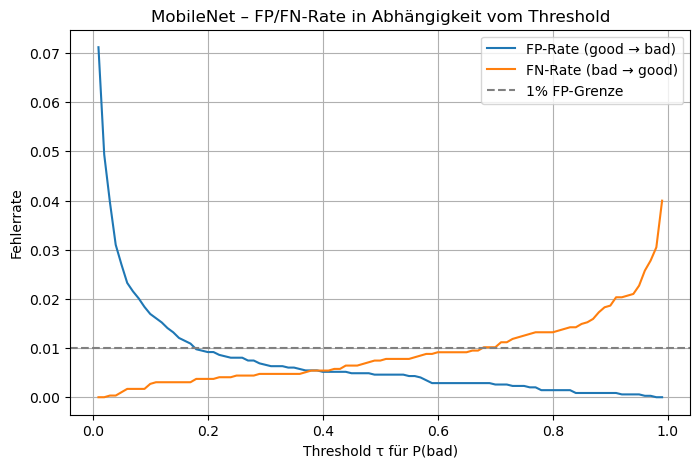

In [125]:
import numpy as np
import torch
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1. Wahrscheinlichkeiten auf dem Validierungs-Set sammeln
# --------------------------------------------------

model_mobilenet.eval()   # <-- richtig für dein Modell

all_probs_bad_m = []     # P(bad) aus MobileNet
all_labels_m    = []     # echte Labels (0 = good, 1 = bad)

with torch.no_grad():
    for images, labels in val_loader_mobilenet:    # <-- falls dein Loader anders heißt, ggf. anpassen
        images = images.to(device)
        labels = labels.to(device)

        outputs = model_mobilenet(images)          # Modellvorhersage
        probs = torch.softmax(outputs, dim=1)      # Softmax in Wahrscheinlichkeiten
        probs_bad = probs[:, 1]                    # Klasse 1 = bad

        all_probs_bad_m.extend(probs_bad.cpu().numpy())
        all_labels_m.extend(labels.cpu().numpy())

all_probs_bad_m = np.array(all_probs_bad_m)
all_labels_m    = np.array(all_labels_m)

print(f"Anzahl Validierungsbeispiele: {len(all_labels_m)}")
print(f"Anteil Klasse good (0): {(all_labels_m == 0).mean():.3f}")
print(f"Anteil Klasse bad  (1): {(all_labels_m == 1).mean():.3f}")

# --------------------------------------------------
# 2. Threshold-Sweep durchführen
# --------------------------------------------------

thresholds = np.linspace(0.01, 0.99, 99)

results_m = []

n_good = (all_labels_m == 0).sum()
n_bad  = (all_labels_m == 1).sum()

for tau in thresholds:

    preds = (all_probs_bad_m >= tau).astype(int)  # 1 = bad, 0 = good

    cm = confusion_matrix(all_labels_m, preds, labels=[0, 1])
    tn, fp, fn, tp = cm.ravel()

    fp_rate = fp / n_good if n_good > 0 else 0.0
    fn_rate = fn / n_bad if n_bad > 0 else 0.0

    results_m.append({
        "tau": tau,
        "fp_rate_good": fp_rate,
        "fn_rate_bad": fn_rate,
        "fp": fp,
        "fn": fn,
        "tn": tn,
        "tp": tp
    })

# --------------------------------------------------
# 3. Thresholds finden, die deine Anforderungen erfüllen
# --------------------------------------------------

valid_candidates_m = [
    r for r in results_m
    if r["fn"] == 0 and r["fp_rate_good"] <= 0.01
]

print("\nKandidaten (MobileNet), die FN=0 und FP ≤ 1% erfüllen:")
if valid_candidates_m:
    for r in valid_candidates_m:
        print(
            f"tau = {r['tau']:.2f} | "
            f"FP-Rate good: {r['fp_rate_good']*100:.2f}% | "
            f"FN = {r['fn']}"
        )
else:
    print("❌ Kein Threshold erfüllt beide Bedingungen.")

# (Optional) bester Threshold
if valid_candidates_m:
    best_m = min(valid_candidates_m, key=lambda r: r["fp_rate_good"])
    best_tau_m = best_m["tau"]
    print(f"\nOptimaler Threshold für MobileNet: {best_tau_m:.3f}")
else:
    best_tau_m = 0.5

# --------------------------------------------------
# 4. FP/FN-Kurven plotten
# --------------------------------------------------

fp_rates_m = [r["fp_rate_good"] for r in results_m]
fn_rates_m = [r["fn_rate_bad"] for r in results_m]

plt.figure(figsize=(8, 5))
plt.plot(thresholds, fp_rates_m, label="FP-Rate (good → bad)")
plt.plot(thresholds, fn_rates_m, label="FN-Rate (bad → good)")
plt.axhline(0.01, color="gray", linestyle="--", label="1% FP-Grenze")
plt.xlabel("Threshold τ für P(bad)")
plt.ylabel("Fehlerrate")
plt.title("MobileNet – FP/FN-Rate in Abhängigkeit vom Threshold")
plt.legend()
plt.grid(True)
plt.show()

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /home/sagem001/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


100%|██████████| 20.5M/20.5M [00:00<00:00, 51.4MB/s]
                                                                                  

EffNet Epoch 1/12 | Train Loss: 0.1204, Train Acc: 0.9540 | Val Loss: 0.0335, Val Acc: 0.9887


EffNet Epoch 2/12 | Train Loss: 0.0390, Train Acc: 0.9864 | Val Loss: 0.0192, Val Acc: 0.9943


EffNet Epoch 3/12 | Train Loss: 0.0262, Train Acc: 0.9911 | Val Loss: 0.0153, Val Acc: 0.9961


EffNet Epoch 4/12 | Train Loss: 0.0203, Train Acc: 0.9932 | Val Loss: 0.0116, Val Acc: 0.9963


EffNet Epoch 5/12 | Train Loss: 0.0167, Train Acc: 0.9946 | Val Loss: 0.0129, Val Acc: 0.9961


EffNet Epoch 6/12 | Train Loss: 0.0139, Train Acc: 0.9950 | Val Loss: 0.0200, Val Acc: 0.9936


EffNet Epoch 7/12 | Train Loss: 0.0132, Train Acc: 0.9962 | Val Loss: 0.0119, Val Acc: 0.9967


EffNet Epoch 8/12 | Train Loss: 0.0105, Train Acc: 0.9965 | Val Loss: 0.0272, Val Acc: 0.9963


EffNet Epoch 9/12 | Train Loss: 0.0093, Train Acc: 0.9972 | Val Loss: 0.0101, Val Acc: 0.9967


EffNet Epoch 10/12 | Train Loss: 0.0079, Train Acc: 0.9978 | Val Loss: 0.0095, Val Acc: 0.9980


EffNet Epoch 11/12 | Train Loss: 0.0108, Train Acc: 0.9963 | Val Loss: 0.0114, Val Acc: 0.9975


EffNet Epoch 12/12 | Train Loss: 0.0073, Train Acc: 0.9976 | Val Loss: 0.0250, Val Acc: 0.9933


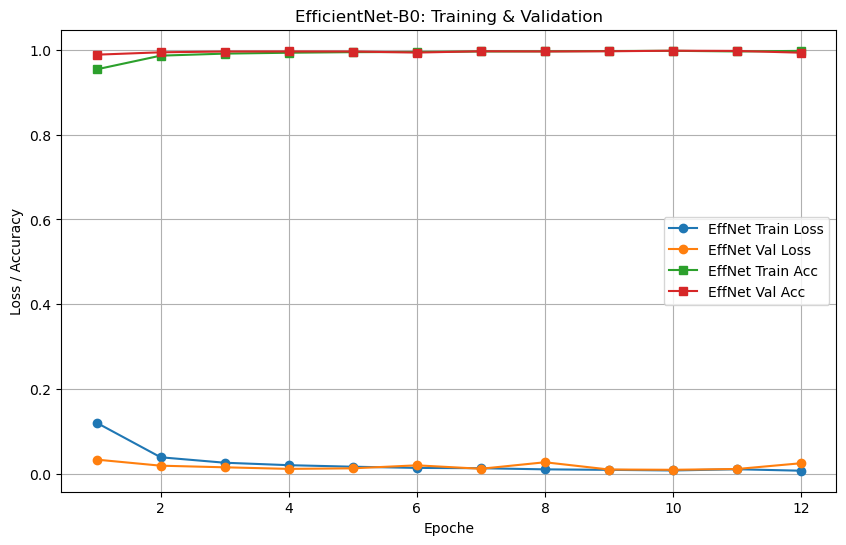

In [126]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from tqdm import tqdm
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 1. EfficientNet-B0 laden (pretrained)
# ---------------------------------------------------------

efficientnet_b0 = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)

# Klassifikationskopf ersetzen für 2 Klassen
in_features = efficientnet_b0.classifier[1].in_features
efficientnet_b0.classifier[1] = nn.Linear(in_features, 2)

efficientnet_b0 = efficientnet_b0.to(device)

# ---------------------------------------------------------
# 2. Fine-Tuning: Letzte N Blöcke + Klassifikator freigeben
# ---------------------------------------------------------

# Erst alles einfrieren
for param in efficientnet_b0.parameters():
    param.requires_grad = False

# Anzahl der Blöcke, die wir trainieren wollen
N = 3   # kann erhöht werden (3–5 ist typisch)

# Features bestehen aus 16 Blöcken → wir nehmen die letzten N
for idx in range(1, N+1):
    for param in efficientnet_b0.features[-idx].parameters():
        param.requires_grad = True

# Kopf immer trainieren
for param in efficientnet_b0.classifier.parameters():
    param.requires_grad = True

# ---------------------------------------------------------
# 3. Loss + Optimizer
# ---------------------------------------------------------

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, efficientnet_b0.parameters()), lr=0.0005)

# ---------------------------------------------------------
# 4. Training
# ---------------------------------------------------------

epochs = 12

eff_train_loss = []
eff_val_loss = []
eff_train_acc = []
eff_val_acc = []

for epoch in range(epochs):
    efficientnet_b0.train()
    running_loss = 0.0
    correct = 0

    loop = tqdm(train_loader, desc=f"EffNet Epoch {epoch+1}/{epochs}", leave=False)

    for images, labels in loop:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = efficientnet_b0(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()

        loop.set_postfix(loss=loss.item())

    train_loss = running_loss / len(train_loader)
    train_acc = correct / len(train_dataset)

    eff_train_loss.append(train_loss)
    eff_train_acc.append(train_acc)

    # ---------------- Validation ----------------
    efficientnet_b0.eval()
    val_loss_total = 0.0
    val_correct = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = efficientnet_b0(images)
            loss = criterion(outputs, labels)

            val_loss_total += loss.item()
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()

    val_loss = val_loss_total / len(val_loader)
    val_acc = val_correct / len(val_dataset)

    eff_val_loss.append(val_loss)
    eff_val_acc.append(val_acc)

    print(f"EffNet Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} "
          f"| Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

# ---------------------------------------------------------
# 5. Plot: Training & Validation
# ---------------------------------------------------------

plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), eff_train_loss, label="EffNet Train Loss", marker='o')
plt.plot(range(1, epochs+1), eff_val_loss, label="EffNet Val Loss", marker='o')
plt.plot(range(1, epochs+1), eff_train_acc, label="EffNet Train Acc", marker='s')
plt.plot(range(1, epochs+1), eff_val_acc, label="EffNet Val Acc", marker='s')

plt.xlabel("Epoche")
plt.ylabel("Loss / Accuracy")
plt.title("EfficientNet-B0: Training & Validation")
plt.legend()
plt.grid(True)
plt.show()

Anzahl Validierungsbeispiele: 6436
Anteil Klasse good (0): 0.541
Anteil Klasse bad  (1): 0.459

Kandidaten (EfficientNet), die FN=0 und FP ≤ 1% erfüllen:
❌ Kein Threshold erfüllt beide Bedingungen gleichzeitig.


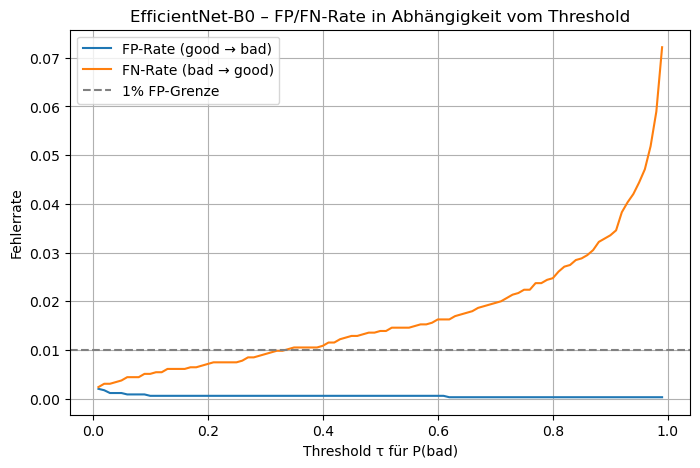

In [128]:
import numpy as np
import torch
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1. Wahrscheinlichkeiten auf dem Validierungs-Set sammeln
# --------------------------------------------------

efficientnet_b0.eval()   # EfficientNet in den Evaluationsmodus setzen

all_probs_bad_eff = []      # P(bad) für jedes Bild
all_labels_eff    = []      # echte Labels (0 = good, 1 = bad)

with torch.no_grad():
    for images, labels in val_loader:  # ggf. val_loader anpassen, falls er anders heißt
        images = images.to(device)
        labels = labels.to(device)

        # Modellvorhersage (Logits)
        outputs = efficientnet_b0(images)

        # Softmax → Klassenwahrscheinlichkeiten
        probs = torch.softmax(outputs, dim=1)

        # Wahrscheinlichkeit für Klasse "bad" (Index 1)
        probs_bad = probs[:, 1]

        all_probs_bad_eff.extend(probs_bad.cpu().numpy())
        all_labels_eff.extend(labels.cpu().numpy())

all_probs_bad_eff = np.array(all_probs_bad_eff)
all_labels_eff    = np.array(all_labels_eff)

print(f"Anzahl Validierungsbeispiele: {len(all_labels_eff)}")
print(f"Anteil Klasse good (0): {(all_labels_eff == 0).mean():.3f}")
print(f"Anteil Klasse bad  (1): {(all_labels_eff == 1).mean():.3f}")

# --------------------------------------------------
# 2. Threshold-Sweep: FP- und FN-Raten über viele Schwellen
# --------------------------------------------------

thresholds_eff = np.linspace(0.01, 0.99, 99)
results_eff = []

n_good_eff = (all_labels_eff == 0).sum()
n_bad_eff  = (all_labels_eff == 1).sum()

for tau in thresholds_eff:
    # Entscheidung: bad (1), wenn P(bad) >= tau, sonst good (0)
    preds = (all_probs_bad_eff >= tau).astype(int)

    # Confusion-Matrix: Zeilen = wahr, Spalten = vorhergesagt
    cm = confusion_matrix(all_labels_eff, preds, labels=[0, 1])
    tn, fp, fn, tp = cm.ravel()

    # FP-Rate bezogen auf gute Flaschen
    fp_rate = fp / n_good_eff if n_good_eff > 0 else 0.0
    # FN-Rate bezogen auf defekte Flaschen
    fn_rate = fn / n_bad_eff if n_bad_eff > 0 else 0.0

    results_eff.append({
        "tau": tau,
        "fp_rate_good": fp_rate,
        "fn_rate_bad": fn_rate,
        "fp": fp,
        "fn": fn,
        "tn": tn,
        "tp": tp
    })

# --------------------------------------------------
# 3. Thresholds suchen, die deine Praxis-Bedingungen erfüllen
#    (FN = 0 UND FP-Rate ≤ 1 %)
# --------------------------------------------------

valid_candidates_eff = [
    r for r in results_eff
    if r["fn"] == 0 and r["fp_rate_good"] <= 0.01
]

print("\nKandidaten (EfficientNet), die FN=0 und FP ≤ 1% erfüllen:")
if valid_candidates_eff:
    for r in valid_candidates_eff:
        print(
            f"tau = {r['tau']:.2f} | "
            f"FP-Rate good: {r['fp_rate_good']*100:.2f}% | "
            f"FN = {r['fn']}"
        )
else:
    print("❌ Kein Threshold erfüllt beide Bedingungen gleichzeitig.")

# Optional: „besten“ Threshold auswählen (minimale FP-Rate bei FN=0)
if valid_candidates_eff:
    best_eff = min(valid_candidates_eff, key=lambda r: r["fp_rate_good"])
    best_tau_eff = best_eff["tau"]
    print(f"\nGewählter Threshold für EfficientNet: tau = {best_tau_eff:.3f}")
else:
    best_tau_eff = 0.5  # Fallback, falls du trotzdem einen Wert brauchst

# --------------------------------------------------
# 4. FP- und FN-Rate als Funktion des Thresholds plotten
# --------------------------------------------------

fp_rates_eff = [r["fp_rate_good"] for r in results_eff]
fn_rates_eff = [r["fn_rate_bad"] for r in results_eff]

plt.figure(figsize=(8, 5))
plt.plot(thresholds_eff, fp_rates_eff, label="FP-Rate (good → bad)")
plt.plot(thresholds_eff, fn_rates_eff, label="FN-Rate (bad → good)")
plt.axhline(0.01, color="gray", linestyle="--", label="1% FP-Grenze")
plt.xlabel("Threshold τ für P(bad)")
plt.ylabel("Fehlerrate")
plt.title("EfficientNet-B0 – FP/FN-Rate in Abhängigkeit vom Threshold")
plt.legend()
plt.grid(True)
plt.show()


In [129]:
import os
from collections import Counter
import re

pfad = "Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures"

# Regex, um Kamera + Perspektive aus Dateinamen zu extrahieren
pattern = re.compile(r"(Cam[12])(Top|Side)_\d+\.jpg", re.IGNORECASE)

# Counter für good/bad pro Kameraperspektive
stats = {
    "Cam1Top": {"good": 0, "bad": 0},
    "Cam2Top": {"good": 0, "bad": 0},
    "Cam1Side": {"good": 0, "bad": 0},
    "Cam2Side": {"good": 0, "bad": 0},
}

for root, dirs, files in os.walk(pfad):
    label = None
    folder = os.path.basename(root).lower()

    if folder == "good":
        label = "good"
    elif folder == "bad":
        label = "bad"
    else:
        continue  # weiterlaufen

    for f in files:
        match = pattern.match(f)
        if match:
            cam = match.group(1)     # Cam1 oder Cam2
            view = match.group(2)    # Top oder Side
            key = f"{cam}{view}"
            stats[key][label] += 1

# Ausgabe
print("Fehlerverteilung je Kameraperspektive:\n")
for key, values in stats.items():
    print(f"{key}: good={values['good']}, bad={values['bad']}")

Fehlerverteilung je Kameraperspektive:

Cam1Top: good=4306, bad=3633
Cam2Top: good=4323, bad=3591
Cam1Side: good=4261, bad=3715
Cam2Side: good=4298, bad=3633


Wie gut dein bestes Modell pro Kamera performt (Accuracy / FN / FP je Cam1Top, Cam2Top, …).
Das wäre ein richtig cooler Analyse-Abschnitt: „Welche Kamera-Perspektive ist für das Modell am informativsten?“

In [136]:
from torchvision.transforms import functional as TF  # NEU

def pad_to_square(img):
    w, h = img.size
    max_side = max(w, h)
    pad_left   = (max_side - w) // 2
    pad_top    = (max_side - h) // 2
    pad_right  = max_side - w - pad_left
    pad_bottom = max_side - h - pad_top

    # TF.pad kann mit PIL-Images umgehen und hat ein `fill`-Argument
    return TF.pad(img, (pad_left, pad_top, pad_right, pad_bottom), fill=0)

In [139]:
train_transform_resnet_opt = transforms.Compose([
    transforms.Lambda(pad_to_square),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

val_transform_resnet_opt = transforms.Compose([
    transforms.Lambda(pad_to_square),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [140]:
model_resnet_opt.eval()

resnet_val_probs_bad = []
resnet_val_labels = []
resnet_val_paths = []

with torch.no_grad():
    for idx in val_idx:
        img_path, label = dataset.samples[idx]
        img = Image.open(img_path).convert("RGB")
        x = val_transform_resnet_opt(img).unsqueeze(0).to(device)

        outputs = model_resnet_opt(x)
        probs = F.softmax(outputs, dim=1)
        prob_bad = probs[0, 1].item()

        resnet_val_probs_bad.append(prob_bad)
        resnet_val_labels.append(label)
        resnet_val_paths.append(img_path)

print("Gesamt Val-Bilder:", len(resnet_val_labels))

Gesamt Val-Bilder: 6436


In [141]:
import numpy as np
from sklearn.metrics import confusion_matrix

def evaluate_per_camera_resnet(all_probs, all_labels, all_paths, threshold=0.5):
    """
    all_probs  : Liste der P(bad)-Wahrscheinlichkeiten aus resnet_val_probs_bad
    all_labels : echte Labels (0 = good, 1 = bad)
    all_paths  : Bildpfade (zur Erkennung der Kamera aus dem Dateinamen)
    threshold  : Schwelle, ab der eine Flasche als 'bad' klassifiziert wird
    """

    # Strukturen für die vier Kameraperspektiven
    cams = {
        "Cam1Top":  {"y_true": [], "y_pred": []},
        "Cam2Top":  {"y_true": [], "y_pred": []},
        "Cam1Side": {"y_true": [], "y_pred": []},
        "Cam2Side": {"y_true": [], "y_pred": []},
    }

    # harte Vorhersagen aus P(bad)
    probs_np = np.array(all_probs)
    preds_np = (probs_np >= threshold).astype(int)
    labels_np = np.array(all_labels)

    # Zuordnung der Beispiele zu den Kameras
    for label, pred, path in zip(labels_np, preds_np, all_paths):
        fname = os.path.basename(path)

        if   "Cam1Top"  in fname:
            cam = "Cam1Top"
        elif "Cam2Top"  in fname:
            cam = "Cam2Top"
        elif "Cam1Side" in fname:
            cam = "Cam1Side"
        elif "Cam2Side" in fname:
            cam = "Cam2Side"
        else:
            continue  # sollte eigentlich nicht vorkommen

        cams[cam]["y_true"].append(label)
        cams[cam]["y_pred"].append(pred)

    # Auswertung pro Kamera
    print("\n=== Kamera-Auswertung ResNet OPT ===\n")
    for cam_name, data in cams.items():
        y_true = np.array(data["y_true"])
        y_pred = np.array(data["y_pred"])

        if len(y_true) == 0:
            continue

        # Confusion Matrix: 0=good, 1=bad
        cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
        tn, fp, fn, tp = cm.ravel()

        accuracy = (tp + tn) / len(y_true)
        precision_bad = tp / (tp + fp + 1e-9)   # wie "zuverlässig" sind bad-Entscheidungen
        recall_bad    = tp / (tp + fn + 1e-9)   # wie viele bads werden gefunden?

        print(f"{cam_name}:")
        print(f"  Anzahl Bilder:          {len(y_true)}")
        print(f"  Accuracy:               {accuracy:.4f}")
        print(f"  False Positives (0→1):  {fp}")
        print(f"  False Negatives (1→0):  {fn}")
        print(f"  Precision (bad):        {precision_bad:.4f}")
        print(f"  Recall/Sensitivität:    {recall_bad:.4f}")
        print("")

# Aufruf für dein ResNet
evaluate_per_camera_resnet(
    all_probs=resnet_val_probs_bad,
    all_labels=resnet_val_labels,
    all_paths=resnet_val_paths,
    threshold=0.5  # kannst du bei Bedarf anpassen
)


=== Kamera-Auswertung ResNet OPT ===

Cam1Top:
  Anzahl Bilder:          1676
  Accuracy:               0.9982
  False Positives (0→1):  0
  False Negatives (1→0):  3
  Precision (bad):        1.0000
  Recall/Sensitivität:    0.9962

Cam2Top:
  Anzahl Bilder:          1535
  Accuracy:               0.9980
  False Positives (0→1):  0
  False Negatives (1→0):  3
  Precision (bad):        1.0000
  Recall/Sensitivität:    0.9958

Cam1Side:
  Anzahl Bilder:          1654
  Accuracy:               0.9952
  False Positives (0→1):  2
  False Negatives (1→0):  6
  Precision (bad):        0.9973
  Recall/Sensitivität:    0.9920

Cam2Side:
  Anzahl Bilder:          1571
  Accuracy:               0.9994
  False Positives (0→1):  0
  False Negatives (1→0):  1
  Precision (bad):        1.0000
  Recall/Sensitivität:    0.9986



Alle Kameras liefern extrem hohe Genauigkeiten (≥ 99,5 %)
Das zeigt, dass das Modell sehr robust gegenüber Perspektivwechseln ist – ein Vorteil gegenüber klassischen, regelbasierten Systemen.

Seitenkamera Cam1Side fällt leicht ab

Cam1Side zeigt die höchste FN-Rate (1→0): 6 falsch erkannte Fehler

Mögliche Gründe:

geometrisch anspruchsvollere Sicht

Bewegungsunschärfe (Side-Views häufiger betroffen)

Beleuchtung / Reflexionen

Cam2Side ist am stabilsten

Beste Kombination aus Accuracy, Precision und Recall

Liefert die zuverlässigsten Bad-Klassifikationen

In [142]:
from collections import defaultdict

# Dict: Kamera -> {"good": x, "bad": y}
true_defect_stats = defaultdict(lambda: {"good": 0, "bad": 0})

for path, label in zip(resnet_val_paths, resnet_val_labels):

    # Kamera bestimmen (Cam1Top, Cam2Top ...)
    cam = None
    if "Cam1Top" in path:
        cam = "Cam1Top"
    elif "Cam2Top" in path:
        cam = "Cam2Top"
    elif "Cam1Side" in path:
        cam = "Cam1Side"
    elif "Cam2Side" in path:
        cam = "Cam2Side"
    else:
        cam = "Unknown"

    # Label einordnen
    if label == 0:
        true_defect_stats[cam]["good"] += 1
    else:
        true_defect_stats[cam]["bad"] += 1

# Ausgabe sortieren (z.B. nach meisten bad)
for cam, vals in true_defect_stats.items():
    print(f"{cam}: good={vals['good']}, bad={vals['bad']}")

Cam1Side: good=905, bad=749
Cam2Top: good=824, bad=711
Cam2Side: good=873, bad=698
Cam1Top: good=882, bad=794


Keine Kameraposition liefert systematisch mehr oder weniger Informationen über fehlerhafte Verschlüsse.
Dies bestätigt die Annahme, dass jede Perspektive einen eigenständigen, relevanten Beitrag zur Erkennung des Tethered-Cap-Fehlers leistet – ein wichtiger Hinweis für die spätere Umsetzung im realen Inspektionssystem, das Bilder aus allen vier Richtungen nutzt.

Schlussfolgerungen für die Praxis

Aus beiden Analysen ergeben sich klare praktische Empfehlungen:

1. Nutzung eines OR-Systems ist gerechtfertigt

Da jede Kamera relevante Fehler sieht, sollte das reale System wie üblich arbeiten:

Eine Flasche wird ausgeschleust, sobald eine der vier Kameras einen Fehler meldet.

Dies erhöht die Robustheit und reduziert FN-Risiken in der Produktion.

2. Fokus auf Kameraoptimierung bei Cam1Side

Da Cam1Side die leicht schwächste Leistung zeigt, könnten hier in der Praxis Verbesserungen sinnvoll sein:

bessere Ausrichtung / Winkel

stabilere Flaschenführung

Anpassung der Belichtung

Bewegungsdämpfung

Diese Erkenntnis wäre wertvoll für die KHS-Engineering-Teams.

3. Deep Learning-Modell ist unabhängig von Kameraperspektiven sehr zuverlässig

Im Gegensatz zu klassischen Regelverfahren zeigt das Modell:

hohe Generalisierung über Perspektiven

Robustheit gegenüber Lage- und Rotationsabweichungen

geringe FP-Raten → praktisch keine unnötigen Ausschleusungen

Dies unterstreicht, warum DL für Tethered Caps eine sinnvolle Technologie ist.
Alle Kameras liefern wertvolle Informationen, das Modell arbeitet in jeder Perspektive mit einer Genauigkeit von über 99 %.
Die meisten Defekte treten an Cam1Side und Cam1Top auf, Cam2Side ist am zuverlässigsten.
Diese Erkenntnisse bestätigen die technische Entscheidung, alle vier Kameras einzeln auszuwerten und anschließend per OR-Logik zu kombinieren.

**Explainability --> GraD-CAM**

Pfad: Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/flirt_orange/bad/Cam2Side_0000000196.jpg
Wahrer Label: 1 (0=good, 1=bad)
Vorhergesagte Klasse: 1 (0=good, 1=bad)


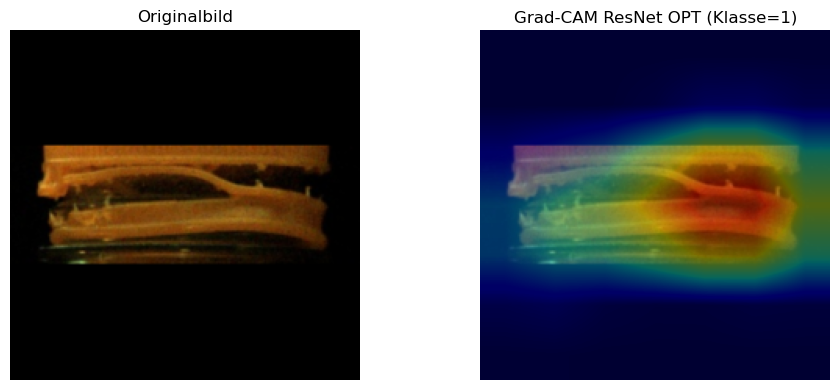

In [158]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import functional as TF
from PIL import Image

############################################################
# 1. Hilfsfunktion: Denormalisieren (für die Visualisierung)
############################################################

IMG_NET_MEAN = torch.tensor([0.485, 0.456, 0.406]).view(1, 3, 1, 1).to(device)
IMG_NET_STD  = torch.tensor([0.229, 0.224, 0.225]).view(1, 3, 1, 1).to(device)

def denormalize_batch(x):
    """
    x: Tensor mit Shape (B, C, H, W), normalisiert auf ImageNet
    Rückgabe: denormalisierter Tensor im Bereich ca. [0,1]
    """
    x = x * IMG_NET_STD + IMG_NET_MEAN
    return torch.clamp(x, 0, 1)


############################################################
# 2. Grad-CAM Klasse für ResNet
############################################################

class GradCAM:
    def __init__(self, model, target_layer):
        """
        model        : dein trainiertes ResNet-Modell
        target_layer : Layer, von dem wir Gradienten & Aktivierungen holen
                       (z.B. model.layer4[-1])
        """
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None

        # Hook speichert die Aktivierungen im Forward-Pass
        self.fwd_handle = target_layer.register_forward_hook(self.save_activation)
        # Hook speichert die Gradienten im Backward-Pass
        self.bwd_handle = target_layer.register_backward_hook(self.save_gradient)

    def save_activation(self, module, input, output):
        self.activations = output.detach()

    def save_gradient(self, module, grad_input, grad_output):
        # grad_output ist ein Tupel, wir brauchen den ersten Eintrag
        self.gradients = grad_output[0].detach()

    def __call__(self, x, class_idx=None):
        """
        x          : Eingabebild als Tensor mit Shape (1, 3, H, W)
        class_idx  : Zielklasse für Grad-CAM (0=good, 1=bad).
                     Wenn None, wird die vorhergesagte Klasse genutzt.
        Rückgabe: cam (H, W), class_idx (int)
        """
        self.model.zero_grad()
        output = self.model(x)              # Forward-Pass

        if class_idx is None:
            class_idx = output.argmax(dim=1).item()

        # Skalarer Output für die Zielklasse
        target = output[:, class_idx]
        target.backward()                   # Backward-Pass für diese Klasse

        grads = self.gradients              # Shape: (1, C, h, w)
        acts  = self.activations            # Shape: (1, C, h, w)

        # Globale Mittelung über räumliche Dimensionen → Gewicht pro Feature-Map
        weights = grads.mean(dim=(2, 3), keepdim=True)  # Shape: (1, C, 1, 1)

        # Lineare Kombination der Feature-Maps mit den Gewichten
        cam = (weights * acts).sum(dim=1, keepdim=True) # Shape: (1, 1, h, w)
        cam = F.relu(cam)                               # nur positive Beiträge

        # Auf Eingabebildgröße hochskalieren
        cam = F.interpolate(cam, size=x.shape[2:], mode="bilinear", align_corners=False)

        # Normieren auf [0,1]
        cam = cam.squeeze().cpu().numpy()
        cam -= cam.min()
        cam /= (cam.max() + 1e-8)

        return cam, class_idx

    def close(self):
        # Hooks wieder entfernen, wenn nicht mehr gebraucht
        self.fwd_handle.remove()
        self.bwd_handle.remove()


############################################################
# 3. Beispiel: Grad-CAM für ein Val-Bild (ResNet OPT)
############################################################

# Beispielindex aus dem Validierungs-Set wählen
# (Du kannst die Zahl beliebig ändern oder in einer Schleife mehrere Bilder auswerten) --> 1004 & 1005 nehmen
sample_idx = val_idx[819]   # z.B. das 100. Val-Bild
img_path, true_label = dataset.samples[sample_idx]

print("Pfad:", img_path)
print("Wahrer Label:", true_label, "(0=good, 1=bad)")

# Bild laden
pil_img = Image.open(img_path).convert("RGB")

# Gleiche Transformation wie beim Validieren
input_tensor = val_transform_resnet_opt(pil_img).unsqueeze(0).to(device)

# Grad-CAM-Instanz für das letzte ResNet-Block (layer4[-1])
gradcam = GradCAM(model_resnet_opt, model_resnet_opt.layer4[-1])

# CAM berechnen, class_idx=None → nimmt vorhergesagte Klasse
cam, pred_class = gradcam(input_tensor)
gradcam.close()

print("Vorhergesagte Klasse:", pred_class, "(0=good, 1=bad)")

# Eingabebild für Darstellung denormalisieren
input_denorm = denormalize_batch(input_tensor.clone()).squeeze(0).cpu().numpy()
input_denorm = np.transpose(input_denorm, (1, 2, 0))  # (H, W, C)

############################################################
# 4. Visualisierung: Originalbild + Grad-CAM-Overlay
############################################################

plt.figure(figsize=(10, 4))

# Originalbild
plt.subplot(1, 2, 1)
plt.title("Originalbild")
plt.imshow(input_denorm)
plt.axis("off")

# Grad-CAM Overlay
plt.subplot(1, 2, 2)
plt.title(f"Grad-CAM ResNet OPT (Klasse={pred_class})")
plt.imshow(input_denorm)
plt.imshow(cam, cmap="jet", alpha=0.4)  # Heatmap halb transparent darüberlegen
plt.axis("off")

plt.tight_layout()
plt.show()

In [159]:
# WICHTIG: GradCAM-Klasse und denormalize_batch müssen vorher definiert sein
# (so wie wir es eben gemacht haben)

def apply_gradcam_resnet_opt(img_path, target_class=None):
    """
    Wendet Grad-CAM auf dein optimiertes ResNet (model_resnet_opt) an.

    img_path     : Pfad zum Bild
    target_class : 0 = good, 1 = bad, oder None -> benutze vorhergesagte Klasse

    Rückgabe:
      cam       : 2D-Heatmap (numpy, Werte 0–1)
      orig_img  : Originalbild als numpy-Array (H, W, C) im Bereich [0,1]
      pred_cls  : vorhergesagte Klasse (int)
    """
    model_resnet_opt.eval()

    # Bild laden
    pil_img = Image.open(img_path).convert("RGB")

    # Gleiche Transform wie im Validation-Set
    x = val_transform_resnet_opt(pil_img).unsqueeze(0).to(device)

    # GradCAM-Objekt auf letztem Block von layer4
    gradcam = GradCAM(model_resnet_opt, model_resnet_opt.layer4[-1])

    # CAM berechnen
    if target_class is None:
        cam, pred_class = gradcam(x)
    else:
        cam, pred_class = gradcam(x, class_idx=target_class)

    gradcam.close()

    # Eingabebild für Darstellung denormalisieren
    x_denorm = denormalize_batch(x.clone()).squeeze(0).cpu().numpy()
    x_denorm = np.transpose(x_denorm, (1, 2, 0))  # (H, W, C)

    return cam, x_denorm, pred_class


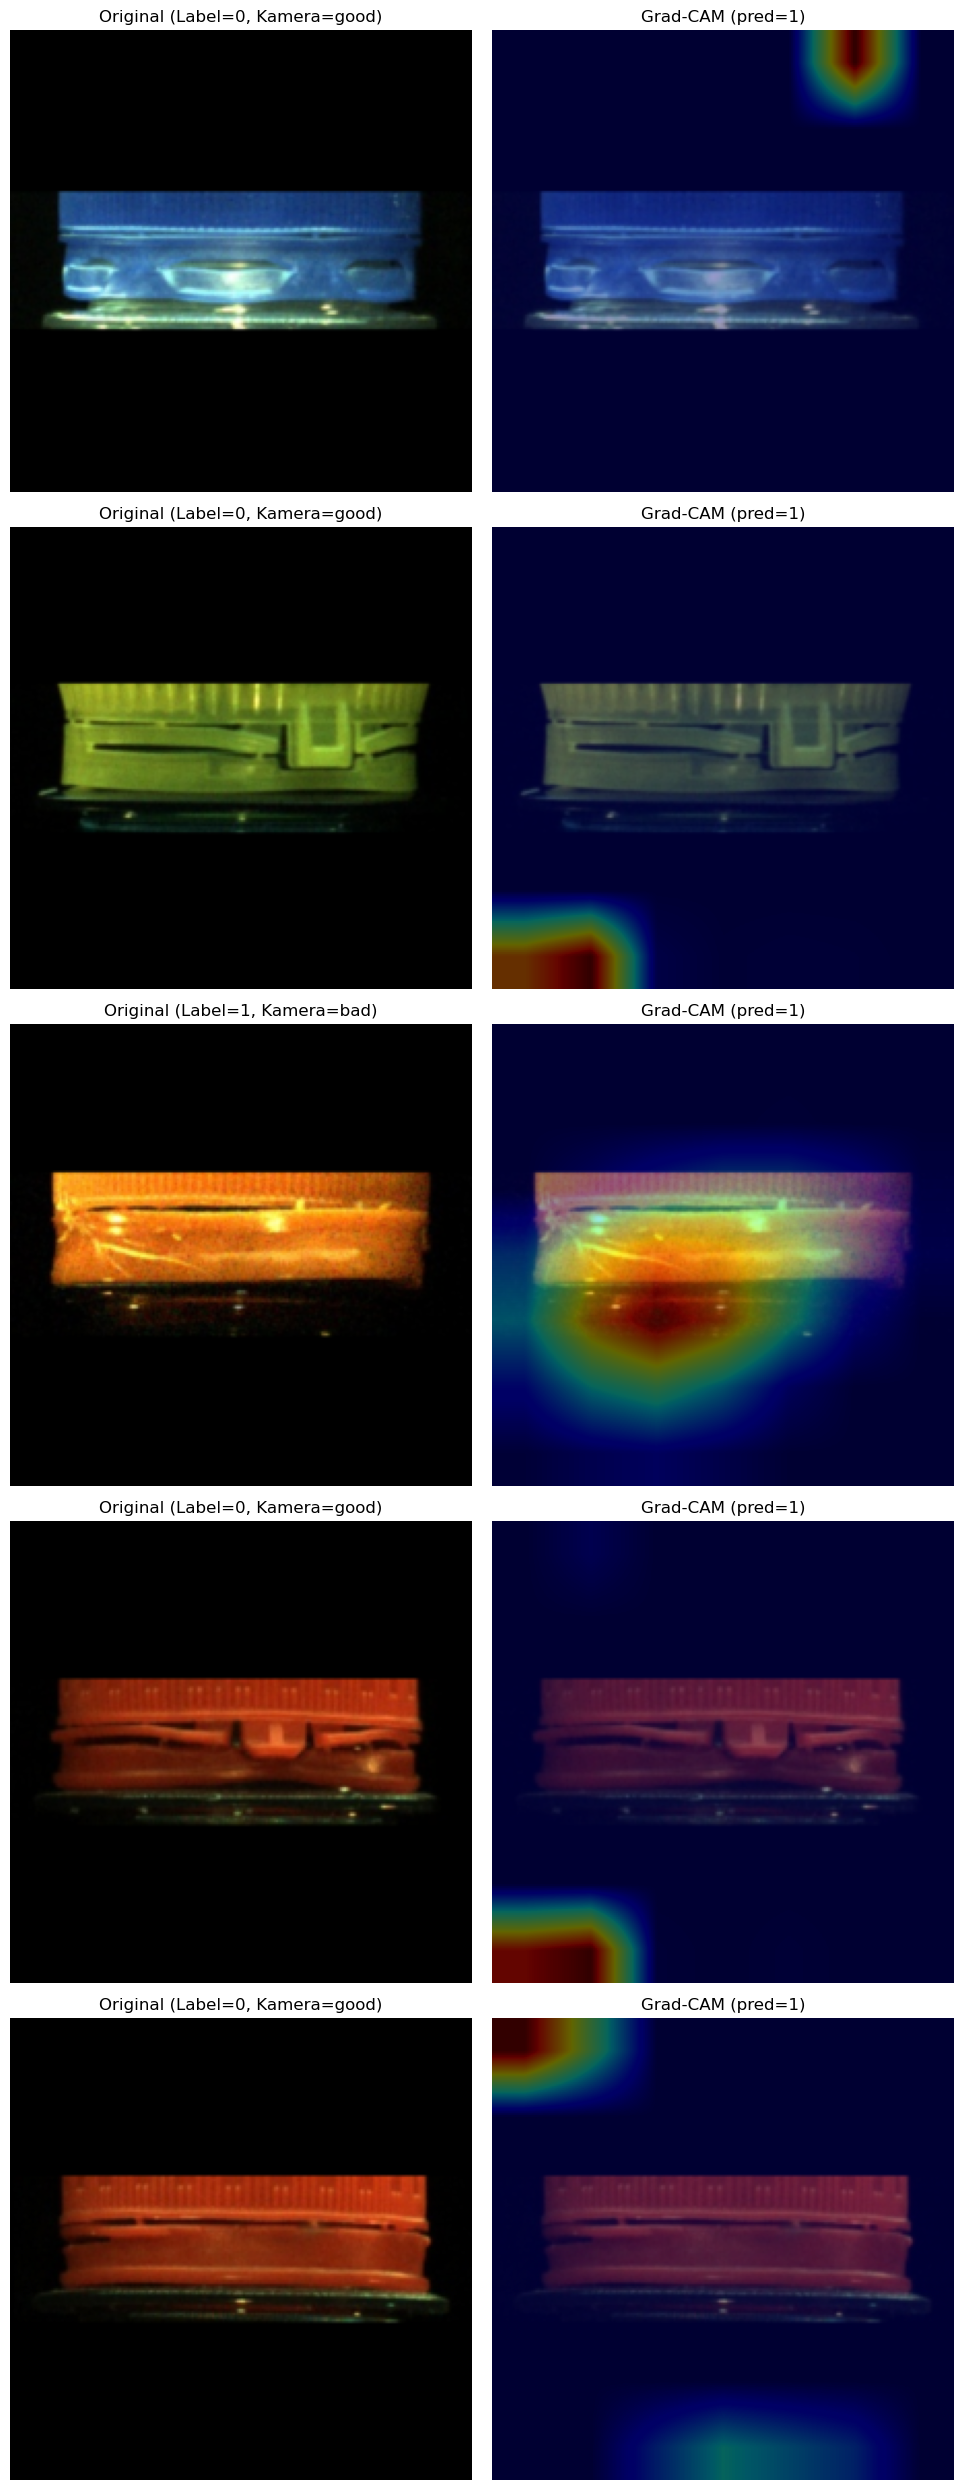

In [160]:
import random
import matplotlib.pyplot as plt

N = 5  # Anzahl der Beispiele

# Zufällige Auswahl aus deinen Validierungs-Indizes
random_examples = random.sample(val_idx, N)

plt.figure(figsize=(10, 5 * N))

for i, idx in enumerate(random_examples, start=1):
    img_path, label = dataset.samples[idx]

    # Grad-CAM für dieses Bild (hier erzwinge ich Klasse 1 = "bad")
    cam, orig_img, pred_cls = apply_gradcam_resnet_opt(
        img_path,
        target_class=1  # oder None, wenn du die jeweils vorhergesagte Klasse willst
    )

    # Original
    plt.subplot(N, 2, 2*i - 1)
    plt.imshow(orig_img)
    plt.title(f"Original (Label={label}, Kamera={os.path.basename(os.path.dirname(img_path))})")
    plt.axis("off")

    # Overlay: Original + Grad-CAM
    plt.subplot(N, 2, 2*i)
    plt.imshow(orig_img)
    plt.imshow(cam, cmap="jet", alpha=0.4)
    plt.title(f"Grad-CAM (pred={pred_cls})")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [1]:
import nbformat

# Notebook einlesen
with open("DL_Projekt.ipynb", "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

# Wortanzahl in Markdown-Zellen berechnen
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').strip().split())

print(f"Wortanzahl in Markdown-Zellen: {word_count}")

Wortanzahl in Markdown-Zellen: 1020
